**Plan**
Вход:(Input) :Данные об акциях в день рынка за длительный период времени(Data about a stock per day of market in long time ):
- Дата (Date)
- Цена (Price)
- Открытие (Open)
- Высокий (High)
- Низкий (Low)
- Объем (Volume)
- Процентов изменения %

Выход:цена этой акции через ~ 300 дней ( price of that stock in ~ 300 days )



```
# This is formatted as code
```

**Preprocessing and Data Exploration**
Plot boxplots, histograms, and line graphs by years
-To analyze
-distribution

> Indented block



-seasonality
-trend
-autocorrelation
-Stationarity test

In [ ]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
import statistics

# Plotting
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

import matplotlib.pyplot as plt
from matplotlib import pyplot



# statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.tsa as tsa
import statsmodels.api as sm

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

In [ ]:
def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__"))

    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'

    return f'Current working directory: {curr_dir}'

In [ ]:
path_to_work('notebooks')


'Current working directory: /content'

In [ ]:
#%matplotlib inline

# Load the "autoreload" extension so that code can change
#%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500,
    'figure.autolayout': True,
    'figure.figsize': [17, 12],
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'font.size': 10,
    'lines.linewidth': 1.0,
    'lines.markersize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True,
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

In [ ]:

df_vale3 = pd.read_csv('vale3_2010-2020.csv',
                              encoding='utf8',
                              delimiter=',',
                              verbose=True)

Tokenization took: 1.30 ms
Type conversion took: 3.47 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df_vale3.head()


,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 19, 2020",55.17,56.33,56.60,54.71,37.86M,-1.78%
1,"Jun 18, 2020",56.17,56.30,56.54,55.61,25.69M,-0.05%
2,"Jun 17, 2020",56.20,55.49,56.44,55.15,27.57M,1.46%
3,"Jun 16, 2020",55.39,55.49,55.50,54.22,29.17M,2.80%
4,"Jun 15, 2020",53.88,52.50,54.43,52.13,27.32M,0.90%


In [ ]:
df_vale3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2495 non-null   object 
 1   Price     2495 non-null   float64
 2   Open      2495 non-null   float64
 3   High      2495 non-null   float64
 4   Low       2495 non-null   float64
 5   Vol.      2495 non-null   object 
 6   Change %  2495 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.6+ KB


In [ ]:
print("Dataframe:\n{} rows\n{} columns".format(df_vale3.shape[0],
                                               df_vale3.shape[1]))

Dataframe:
2495 rows
7 columns


In [ ]:
list_columns = (df_vale3.columns).tolist()

print("-"*25, "List Columns", "-"*25, end='\n')
display(list_columns)

------------------------- List Columns -------------------------


['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']

In [ ]:
df_vale3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2495 non-null   object 
 1   Price     2495 non-null   float64
 2   Open      2495 non-null   float64
 3   High      2495 non-null   float64
 4   Low       2495 non-null   float64
 5   Vol.      2495 non-null   object 
 6   Change %  2495 non-null   object 
dtypes: float64(4), object(3)
memory usage: 136.6+ KB


1. Columns:

Date (x axis): data date

Price (y-axis): - цена закрытия. Что мы будем прогнозировать ( the closing price. What will be predicted)

Open: открыт (оеopening price)

High: высокое(maximum price reached)

Low: низкое (minimum price reached)

Vol.: объём (volume of shares traded)

Change %: процентов измения (percentage of change compared to the previous day.)

**Explore Data**

In [ ]:
def show_measures_location(df: 'dataframe', type_descr: 'list') -> None:
    """
    Function get measures localization + total col + % type columns
    Handler when type data not exists

    Args:
    type_descr
        np.number, np.object  -> return summary statistic with all columns
        np.number             -> return summary statistic numerical columns
        np.object             -> return summary statistic object columns
    """
    try:
        col = (df.describe(include=type_descr).columns)  # pandas.core.indexes.base.Index
    except ValueError:
        print(f'Dataframe not contains {type_descr} columns !', end='\n\n')
    else:
        list_col = col.tolist()
        percentage = (len(list_col) / df.shape[1]) * 100

        print("-"*25, "MEASURES OF LOCALIZATION", "-"*25, end='\n\n')
        print(f"TOTAL columns {type_descr}: {len(list_col)}")
        print("PERCENTAGE {} in dataframe: {:3.4} %".format(type_descr, percentage))

        return df.describe(include=type_descr)

In [ ]:
show_measures_location(df=df_vale3,
                       type_descr=[np.number, np.object])

------------------------- MEASURES OF LOCALIZATION -------------------------

TOTAL columns [<class 'numpy.number'>, <class 'object'>]: 7
PERCENTAGE [<class 'numpy.number'>, <class 'object'>] in dataframe: 100.0 %


,Date,Price,Open,High,Low,Vol.,Change %
count,2495,2495.00,2495.00,2495.00,2495.00,2495,2495
unique,2495,NaN,NaN,NaN,NaN,1339,927
top,"Jun 19, 2020",NaN,NaN,NaN,NaN,3.99M,0.00%
freq,1,NaN,NaN,NaN,NaN,9,20
mean,NaN,35.80,35.83,36.32,35.32,NaN,NaN
std,NaN,12.28,12.28,12.34,12.18,NaN,NaN
min,NaN,8.60,8.75,9.06,8.60,NaN,NaN
25%,NaN,26.88,26.93,27.34,26.61,NaN,NaN
50%,NaN,36.88,36.87,37.42,36.30,NaN,NaN
75%,NaN,46.36,46.33,46.83,45.73,NaN,NaN


In [ ]:
df_vale3.nunique()


Date        2495
Price       1845
Open        1816
High        1852
Low         1845
Vol.        1339
Change %     927
dtype: int64

In [ ]:
df_vale3.mode(dropna=False, numeric_only=True)


,Price,Open,High,Low
0,27.43,51.00,38.15,17.65
1,NaN,NaN,44.33,NaN
2,NaN,NaN,52.09,NaN
3,NaN,NaN,53.12,NaN


In [ ]:
df_vale3.median()


Price   36.88
Open    36.87
High    37.42
Low     36.30
dtype: float64

In [ ]:
df_vale3.isnull().any()


Date        False
Price       False
Open        False
High        False
Low         False
Vol.        False
Change %    False
dtype: bool

In [ ]:
df_vale3.duplicated().any()


False

**Data Preparation: Cleaning** \\
The ST analysis is univariate, that is, only the price column in relation to the time that will be predicted. This will ensure a better comparison between statistical, machine learning and deep learning models. \\
**All columns in lowercase**

In [ ]:
df_vale3.columns =  map(str.lower, df_vale3.columns)
print(df_vale3.columns)

Index(['date', 'price', 'open', 'high', 'low', 'vol.', 'change %'], dtype='object')


**column list**

In [ ]:
list_columns = []
list_columns = df_vale3.columns

list_columns

Index(['date', 'price', 'open', 'high', 'low', 'vol.', 'change %'], dtype='object')

In [ ]:
df_vale3['date'] = pd.to_datetime(df_vale3['date'])
df_vale3 = df_vale3.iloc[::-1]
df_vale3.head(10)


,date,price,open,high,low,vol.,change %
2494,2010-05-20,39.79,40.21,40.93,39.79,6.09M,-3.61%
2493,2010-05-21,42.46,40.17,42.75,39.92,3.86M,6.71%
2492,2010-05-24,42.02,42.28,43.10,42.02,2.64M,-1.04%
2491,2010-05-25,42.39,40.86,42.67,40.23,4.53M,0.88%
2490,2010-05-26,42.17,42.96,44.52,42.17,5.53M,-0.52%
2489,2010-05-27,44.82,43.73,45.03,43.59,5.07M,6.28%
2488,2010-05-28,44.42,44.82,45.39,43.97,4.42M,-0.89%
2487,2010-05-31,45.37,44.73,45.50,44.73,4.78M,2.14%
2486,2010-06-01,44.39,44.30,45.09,44.28,3.37M,-2.16%
2485,2010-06-02,45.32,44.28,45.73,44.28,2.04M,2.10%


In [ ]:
df_vale3['date'] = pd.to_datetime(df_vale3['date'])
df_vale3 = df_vale3.iloc[::-1]
df_vale3.head(10)


,date,price,open,high,low,vol.,change %
0,2020-06-19,55.17,56.33,56.60,54.71,37.86M,-1.78%
1,2020-06-18,56.17,56.30,56.54,55.61,25.69M,-0.05%
2,2020-06-17,56.20,55.49,56.44,55.15,27.57M,1.46%
3,2020-06-16,55.39,55.49,55.50,54.22,29.17M,2.80%
4,2020-06-15,53.88,52.50,54.43,52.13,27.32M,0.90%
5,2020-06-12,53.40,53.71,54.05,51.98,31.18M,-1.48%
6,2020-06-10,54.20,54.91,55.20,53.76,24.19M,-1.44%
7,2020-06-09,54.99,54.16,54.99,54.12,19.61M,0.38%
8,2020-06-08,54.78,54.98,55.65,53.98,27.19M,0.31%
9,2020-06-05,54.61,56.39,56.70,54.34,39.64M,-1.89%


In [ ]:
df_vale3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2495 non-null   datetime64[ns]
 1   price     2495 non-null   float64       
 2   open      2495 non-null   float64       
 3   high      2495 non-null   float64       
 4   low       2495 non-null   float64       
 5   vol.      2495 non-null   object        
 6   change %  2495 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 136.6+ KB


In [ ]:
df_vale3_date_index = df_vale3
df_vale3_date_index.index.names = ['date']
df_vale3_date_index.index = df_vale3['date']
df_vale3_date_index.index = pd.to_datetime(df_vale3.index)

print(df_vale3_date_index.index.freq)
print(df_vale3_date_index.index)
df_vale3_date_index.head()


None
DatetimeIndex(['2020-06-19', '2020-06-18', '2020-06-17', '2020-06-16',
               '2020-06-15', '2020-06-12', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05',
               ...
               '2010-06-02', '2010-06-01', '2010-05-31', '2010-05-28',
               '2010-05-27', '2010-05-26', '2010-05-25', '2010-05-24',
               '2010-05-21', '2010-05-20'],
              dtype='datetime64[ns]', name='date', length=2495, freq=None)


,date,price,open,high,low,vol.,change %
date,,,,,,,
2020-06-19,2020-06-19,55.17,56.33,56.60,54.71,37.86M,-1.78%
2020-06-18,2020-06-18,56.17,56.30,56.54,55.61,25.69M,-0.05%
2020-06-17,2020-06-17,56.20,55.49,56.44,55.15,27.57M,1.46%
2020-06-16,2020-06-16,55.39,55.49,55.50,54.22,29.17M,2.80%
2020-06-15,2020-06-15,53.88,52.50,54.43,52.13,27.32M,0.90%


In [ ]:
df_vale3.index
df_vale3.drop(['open', 'high', 'low', 'vol.','change %'], axis=1, inplace=True)
df_vale3.index


DatetimeIndex(['2020-06-19', '2020-06-18', '2020-06-17', '2020-06-16',
               '2020-06-15', '2020-06-12', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05',
               ...
               '2010-06-02', '2010-06-01', '2010-05-31', '2010-05-28',
               '2010-05-27', '2010-05-26', '2010-05-25', '2010-05-24',
               '2010-05-21', '2010-05-20'],
              dtype='datetime64[ns]', name='date', length=2495, freq=None)

In [ ]:
df_vale3.index


DatetimeIndex(['2020-06-19', '2020-06-18', '2020-06-17', '2020-06-16',
               '2020-06-15', '2020-06-12', '2020-06-10', '2020-06-09',
               '2020-06-08', '2020-06-05',
               ...
               '2010-06-02', '2010-06-01', '2010-05-31', '2010-05-28',
               '2010-05-27', '2010-05-26', '2010-05-25', '2010-05-24',
               '2010-05-21', '2010-05-20'],
              dtype='datetime64[ns]', name='date', length=2495, freq=None)

In [ ]:
def plot_box_plot(df: 'dataframe', data_set_name: str, xlim=None):
    """
    Creates a seaborn boxplot including all dependent

    Args:
    data_set_name: Name of title for the boxplot
    xlim: Set upper and lower x-limits

    Returns:
    Box plot with specified data_frame, title, and x-limits
    """
    fig, ax = plt.subplots(figsize=(18, 10))

    if xlim is not None:
        plt.xlim(*xlim)

    plt.title(f"Horizontal Boxplot {data_set_name}")

    plt.ylabel('Dependent Variables')
    plt.xlabel('Measurement x')
    ax = sns.boxplot(data = df,
                    orient = 'h',
                    palette = 'Set2',
                    notch = False, # box instead of notch shape
                    sym = 'rs')  # red squares for outliers

    plt.show()

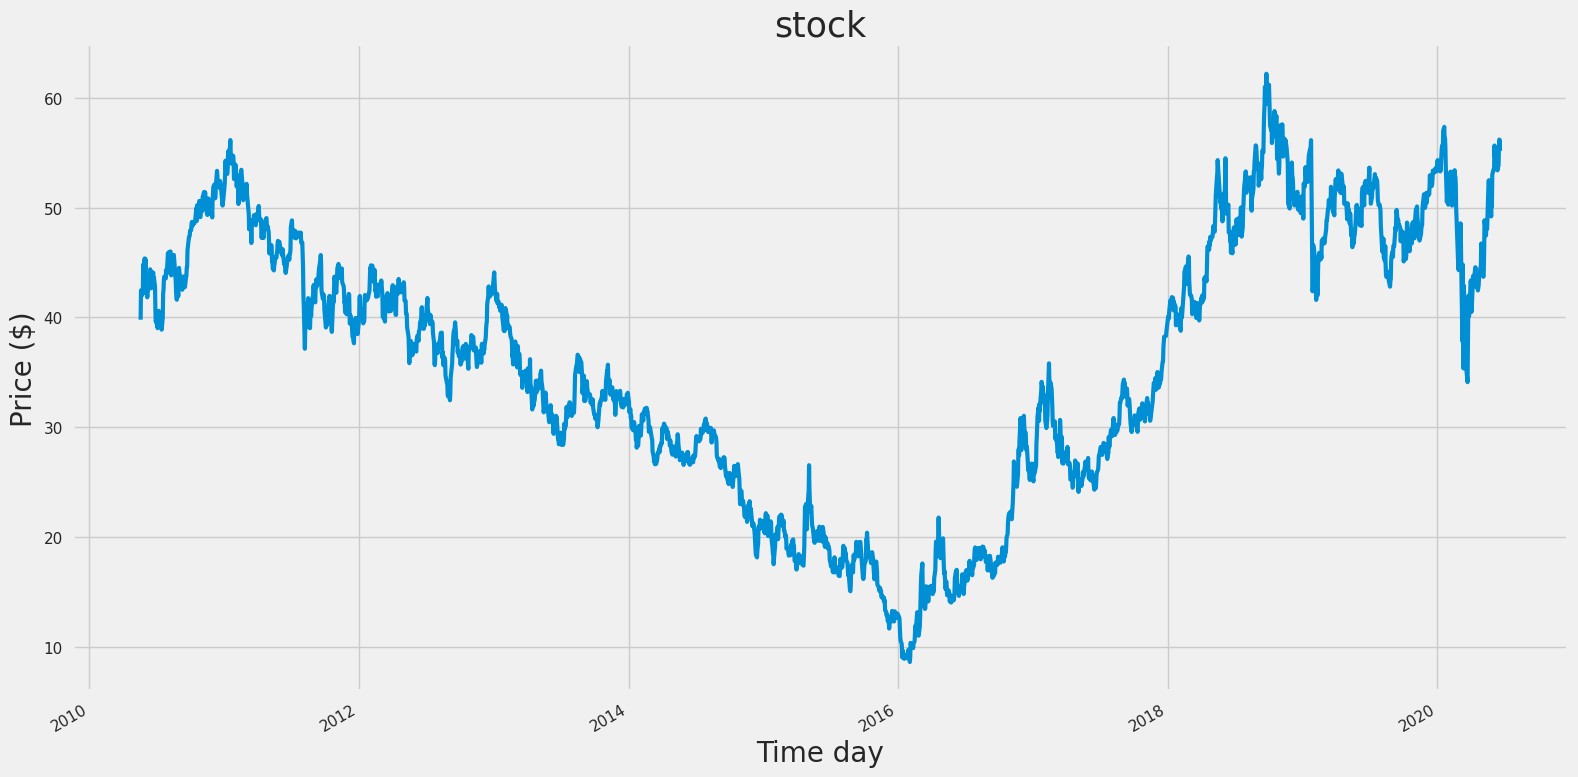

In [ ]:
img_vale3_distr_line = df_vale3_date_index['price'].plot(linewidth=3)

plt.title(f'stock', fontsize=25)
plt.xlabel("Time day", fontsize=20)
plt.ylabel("Price ($)", fontsize=20)
plt.grid(True)

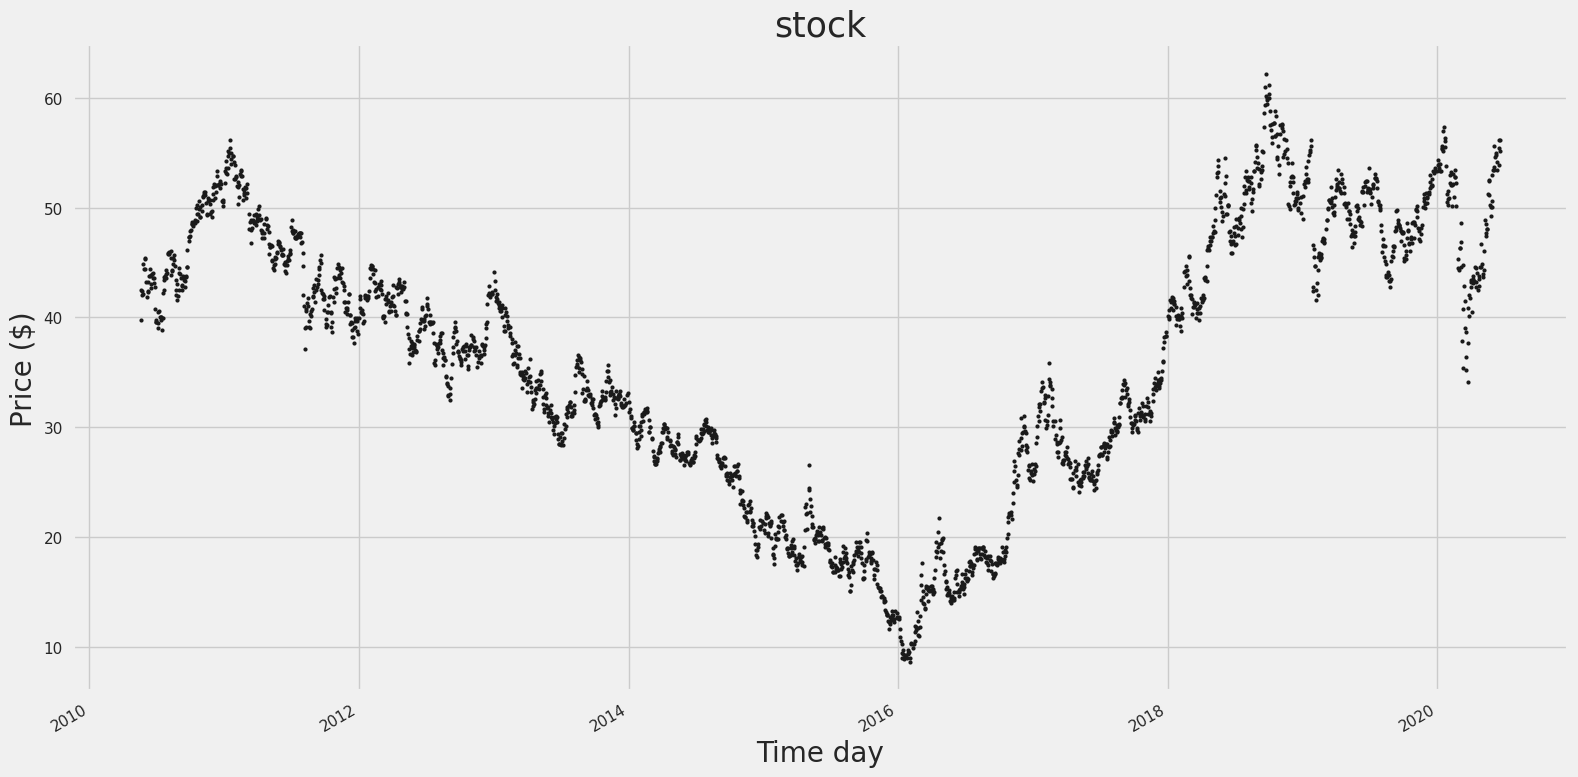

In [ ]:
#save_image(img=img_vale3_distr_line, name='img_vale3_distr_line')
img_vale3_distr_scatter = df_vale3_date_index['price'].plot(style='k.')

plt.title(f'stock', fontsize=25)
plt.xlabel("Time day", fontsize=20)
plt.ylabel("Price ($)", fontsize=20)
plt.grid(True)

In [ ]:
decomposition_add = seasonal_decompose(df_vale3['price'],model='multiplicative',period = 30)
trend = decomposition_add.trend
seasonal = decomposition_add.seasonal
residual = decomposition_add.resid

<Axes: xlabel='date', ylabel='residue'>

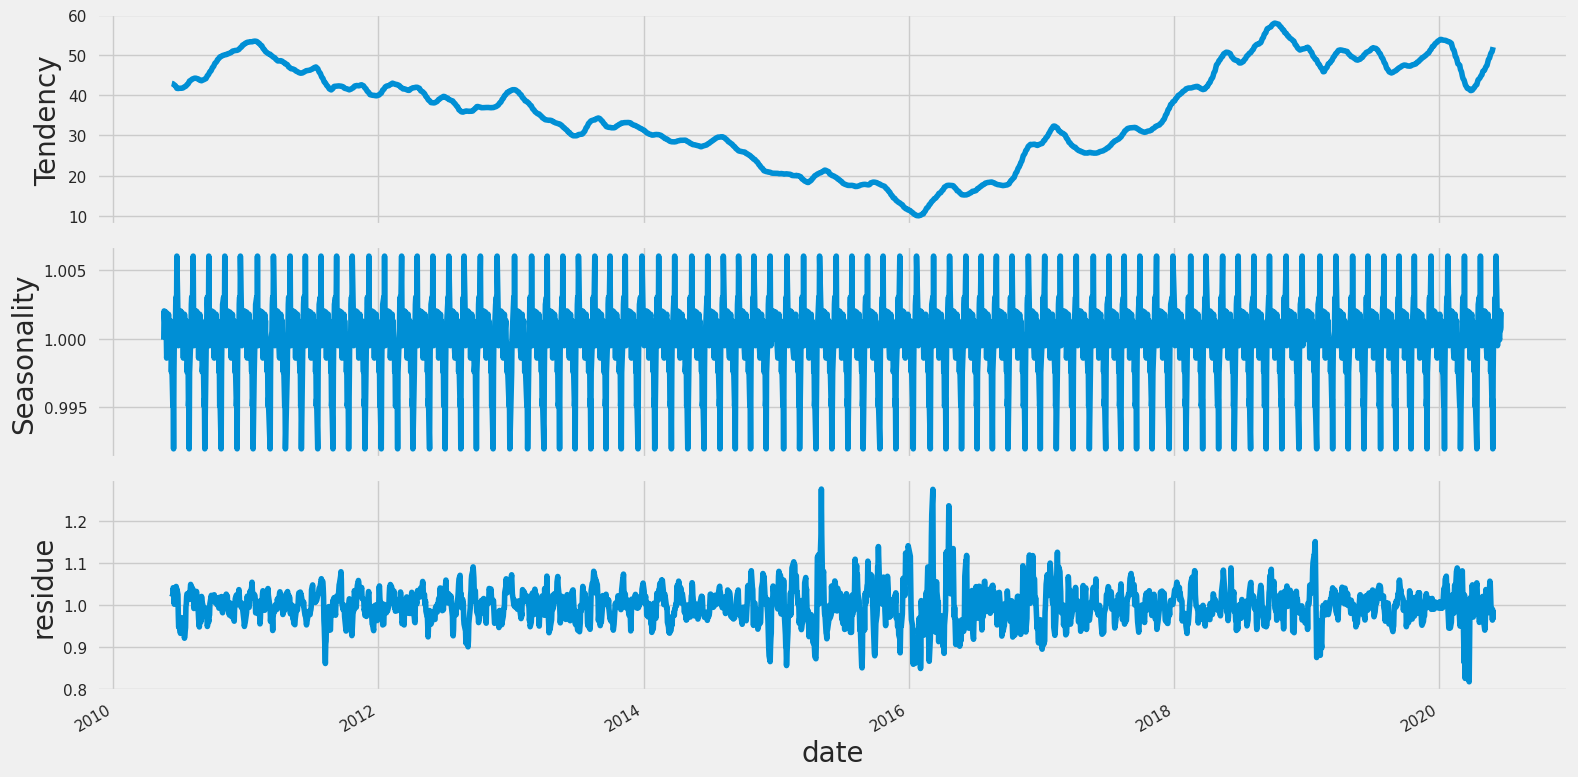

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True)

axes[0].set_ylabel('Tendency', fontsize=20)
axes[1].set_ylabel('Seasonality', fontsize=20)
axes[2].set_ylabel('residue', fontsize=20)
axes[2].set_xlabel('time day', fontsize=20)

decomposition_add.trend.plot(ax=axes[0])
decomposition_add.seasonal.plot(ax=axes[1])
decomposition_add.resid.plot(ax=axes[2])

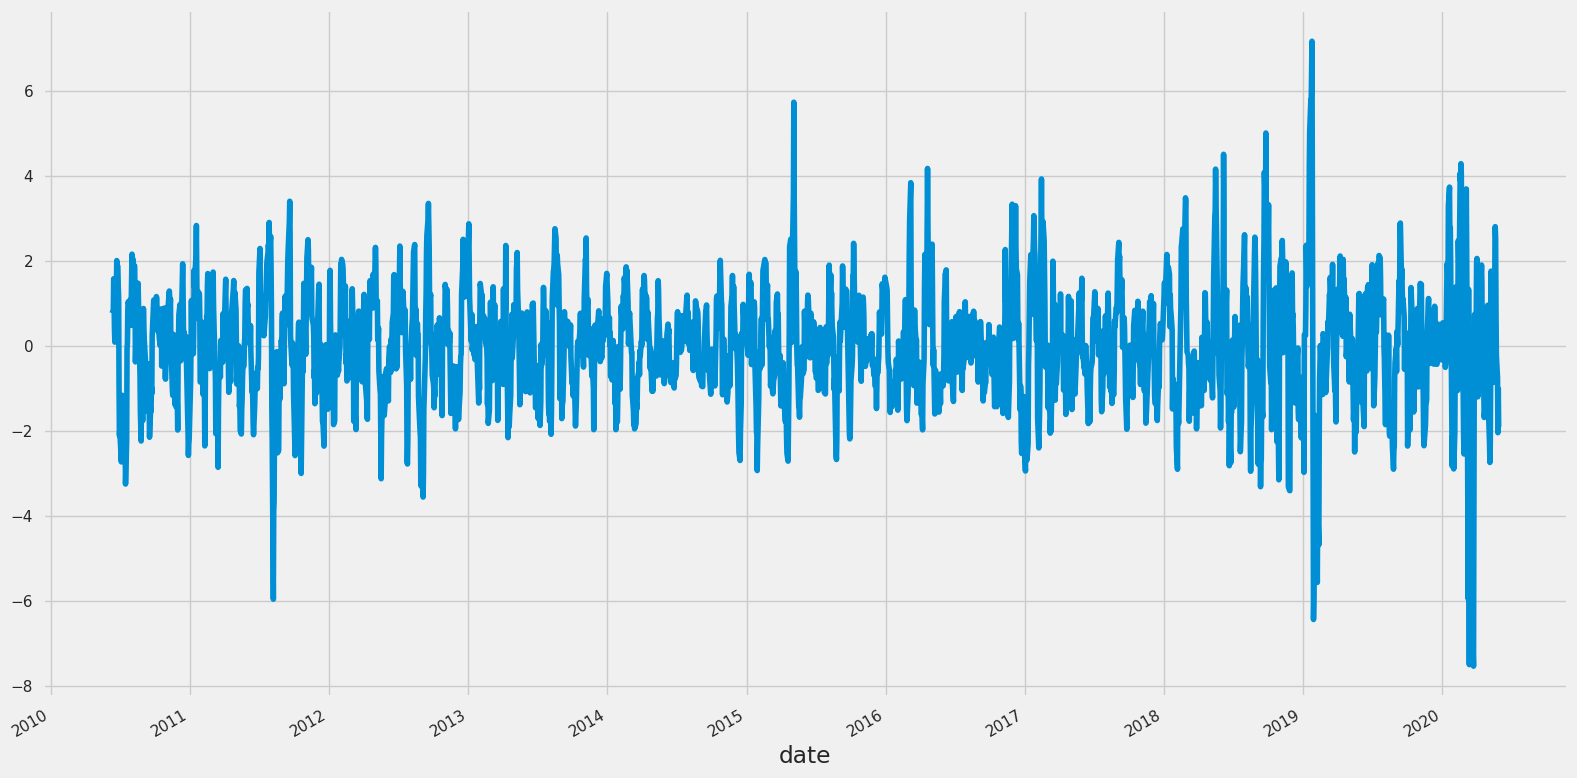

In [ ]:
df_vale3_without_trend = df_vale3['price'] - trend
img_df_vale3_without_trend = df_vale3_without_trend.plot()
#save_image(img=img_df_vale3_without_trend, name='img_df_vale3_without_trend')

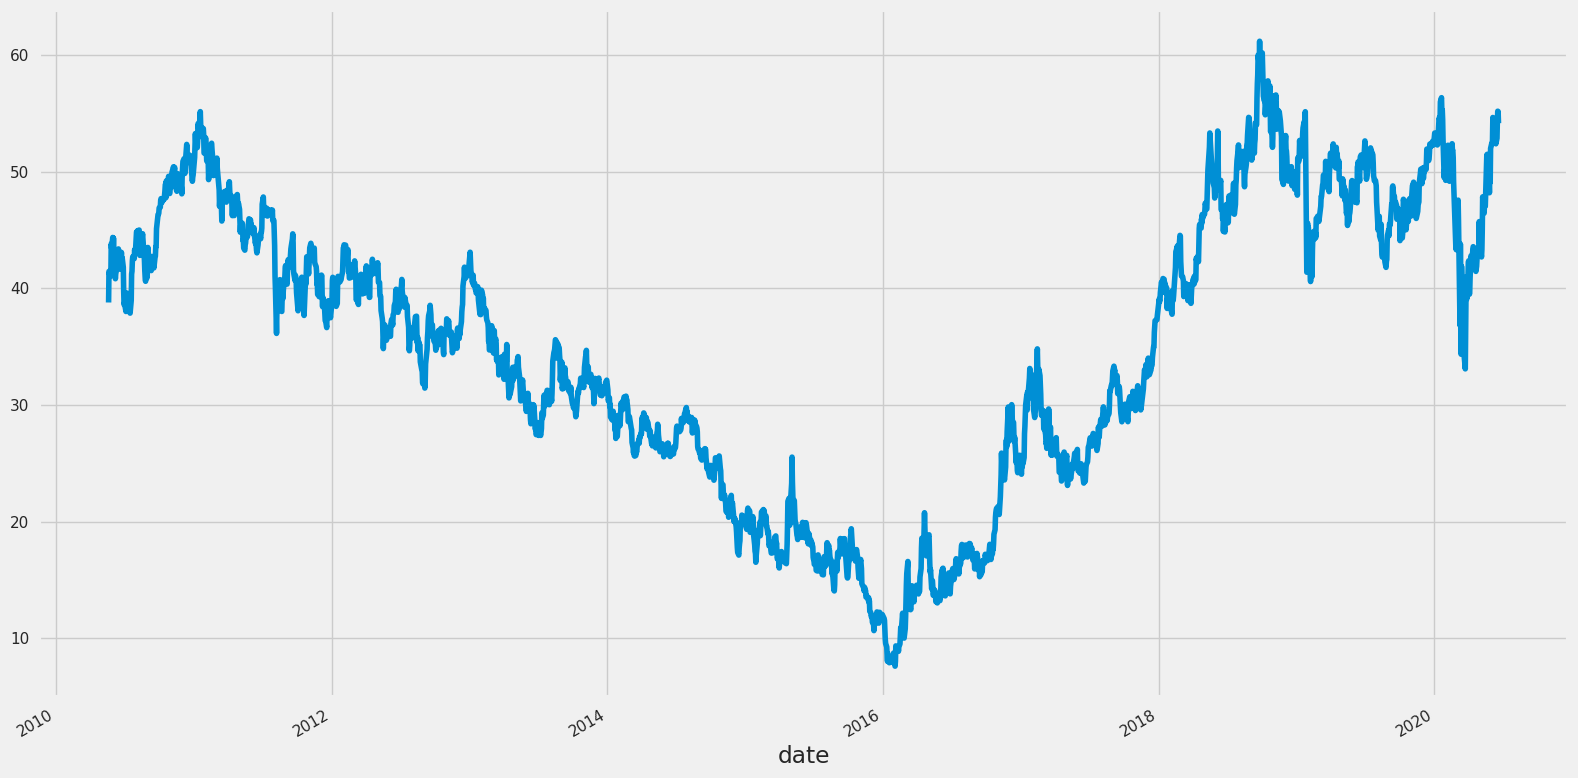

In [ ]:
df_vale3_without_seasonal = df_vale3['price'] - seasonal
img_df_vale3_without_seasonal = df_vale3_without_seasonal.plot()
#save_image(img=img_df_vale3_without_seasonal, name='img_df_vale3_without_seasonal')

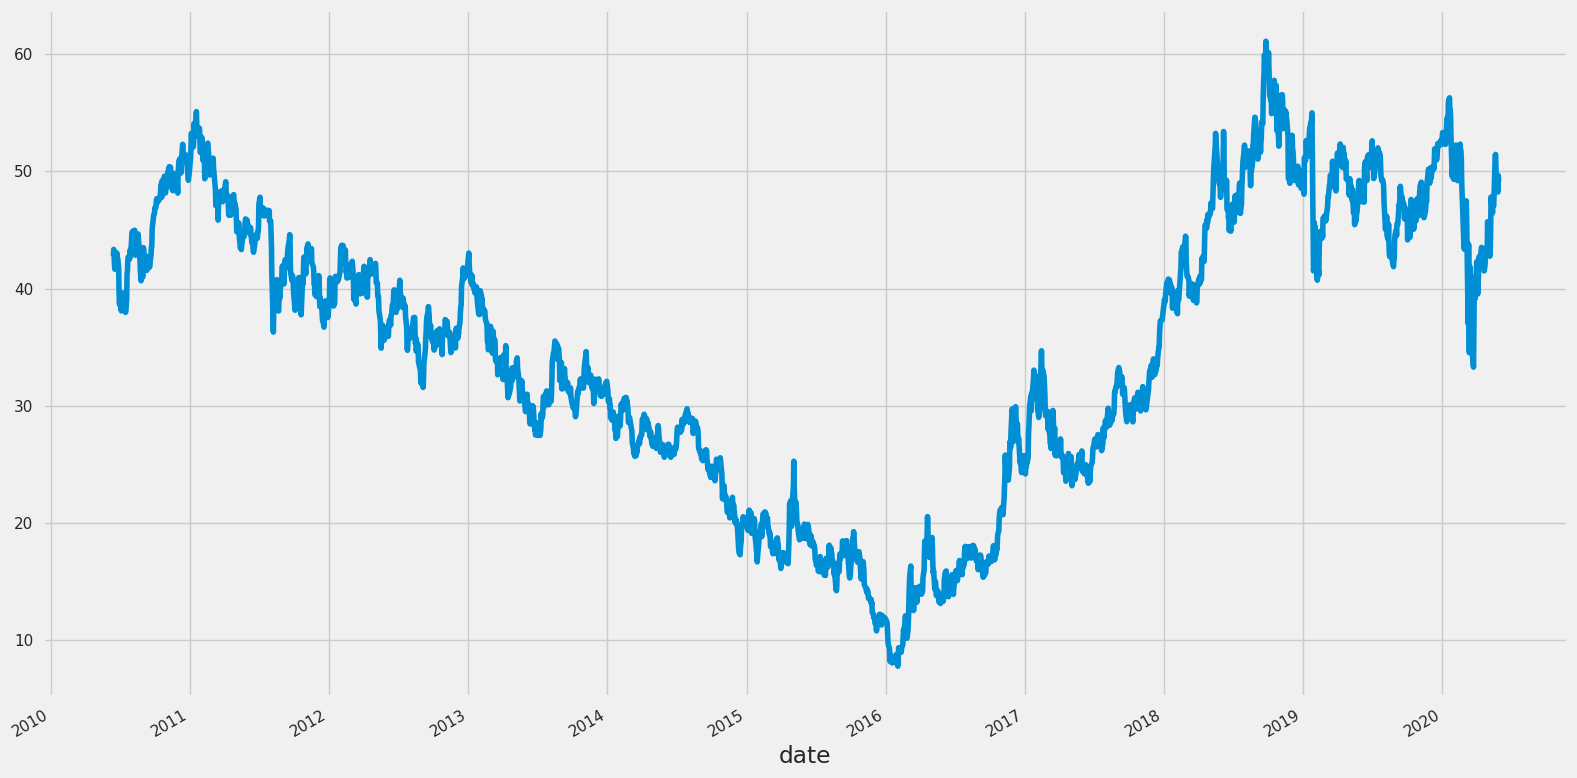

In [ ]:
df_vale3_without_resid = df_vale3['price'] - residual
df_vale3_without_resid = df_vale3_without_resid.plot()
#save_image(img=df_vale3_without_resid, name='df_vale3_without_resid')

**NOTES**:

**The ST decomposition demonstrates:**
There have been 2 major trends and in recent years the price has not shown an obvious trend.
Seasonality occurs every 30 days.

**Auto-correlation**

Авторегрессионные модели, такие как ARIMA, предполагают, что предыдущие наблюдения полезны для прогнозирования значения следующего временного шага.(Autoregressive models like ARIMA assume that previous observations are useful in predicting the value of the next time step.
The stronger the correlation between the output variable and a specific lagged variable, the more weight the autoregression model can place on that variable).

**NOTES**:
The correlation is calculated between the variable and itself in previous time steps, hence the name autocorrelation.
Calculating correlation can also help choose which lag variables will be useful in a model and which will not.
If the lag variables show low or no correlation with the output variable, the time series may not be predictable.
wiki
Autocorrelation analysis is a mathematical tool for finding repetitive patterns, such as the presence of a periodic signal obscured by noise or identifying the missing fundamental frequency in a signal implied by its harmonic frequencies. It is often used in signal processing to analyze functions or series of values, such as time-domain signals.

(Корреляция рассчитывается между переменной и самой собой на предыдущих временных шагах, отсюда и название автокорреляция.
Расчет корреляции также может помочь выбрать, какие запаздывающие переменные будут полезны в модели, а какие нет.
Если запаздывающие переменные демонстрируют низкую корреляцию или вообще не коррелируют с выходной переменной, временной ряд может оказаться непредсказуемым.
вики
Автокорреляционный анализ — это математический инструмент для поиска повторяющихся закономерностей, таких как наличие периодического сигнала, скрытого шумом, или определение недостающей основной частоты в сигнале, подразумеваемой его гармоническими частотами. Он часто используется при обработке сигналов для анализа функций или серий значений, таких как сигналы во временной области.)

In [ ]:
df_vale3_date_index['price'].autocorr(lag=1)
#save_image(img=img_df_vale3_autocorr_1, name='img_df_vale3_autocorr_1')

0.9972513584845022

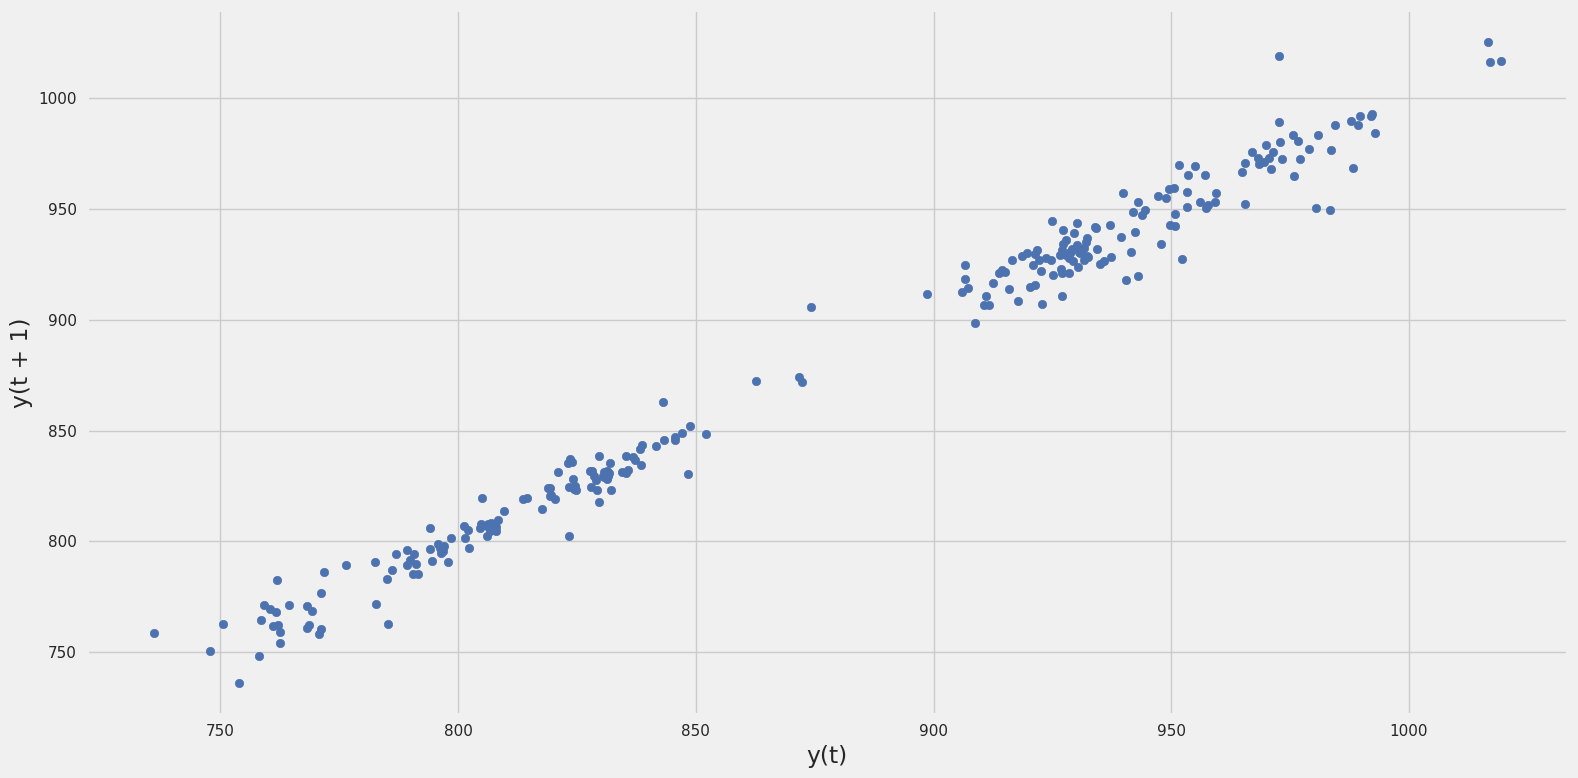

In [ ]:
img_df_vale3_autocorr_1 = lag_plot(df_vale3_date_index['price'], lag=1)


In [ ]:
df_vale3_date_index['price'].autocorr(lag=30)


0.9459357661702156

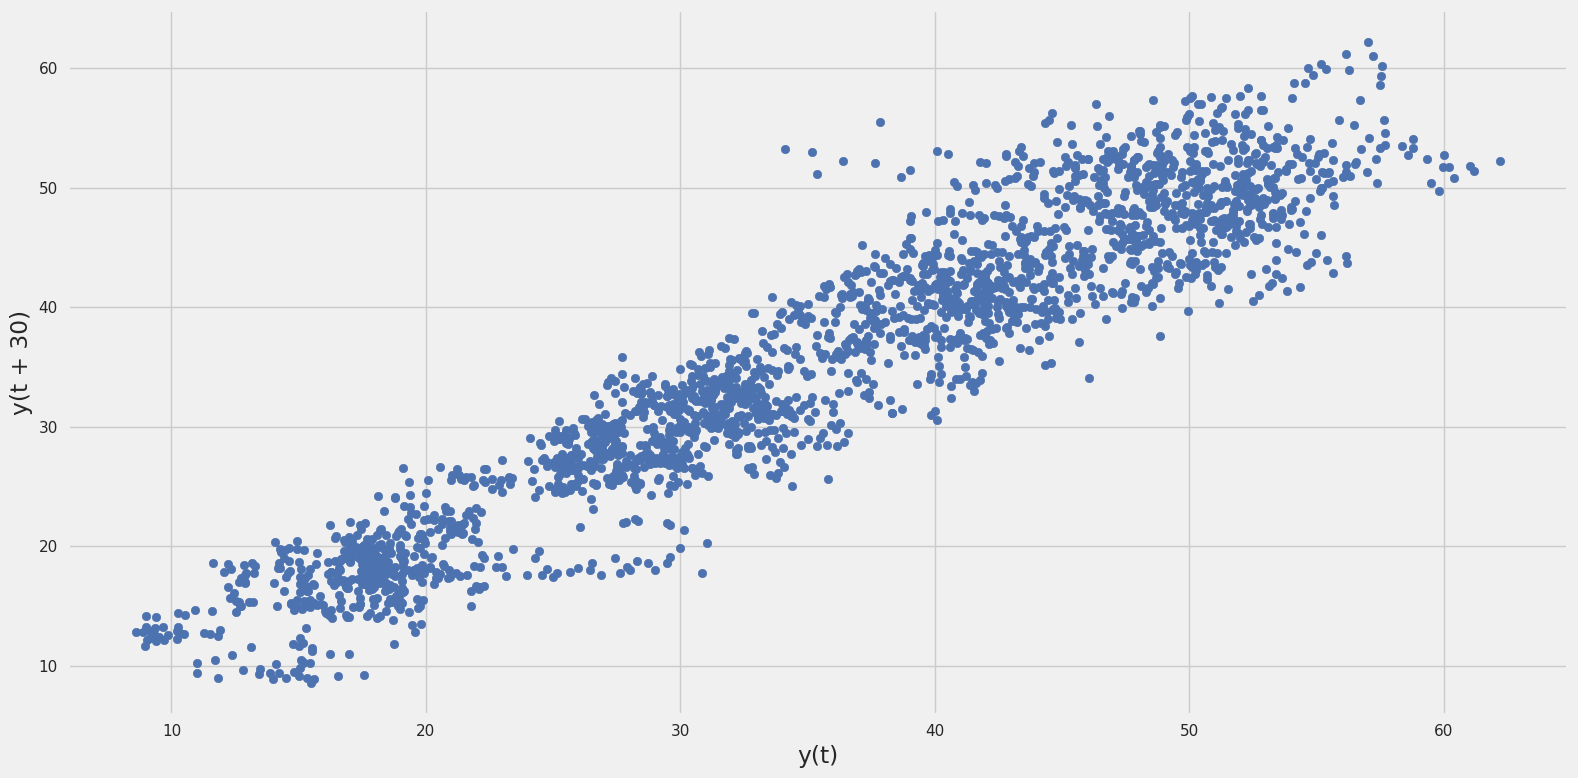

In [ ]:
img_df_vale3_autocorr = lag_plot(df_vale3_date_index['price'], lag=30)
#save_image(img=img_df_vale3_autocorr, name='img_df_vale3_autocorr')

In [ ]:
df_vale3_date_index['price'].autocorr(lag=313)


0.5017662028027131

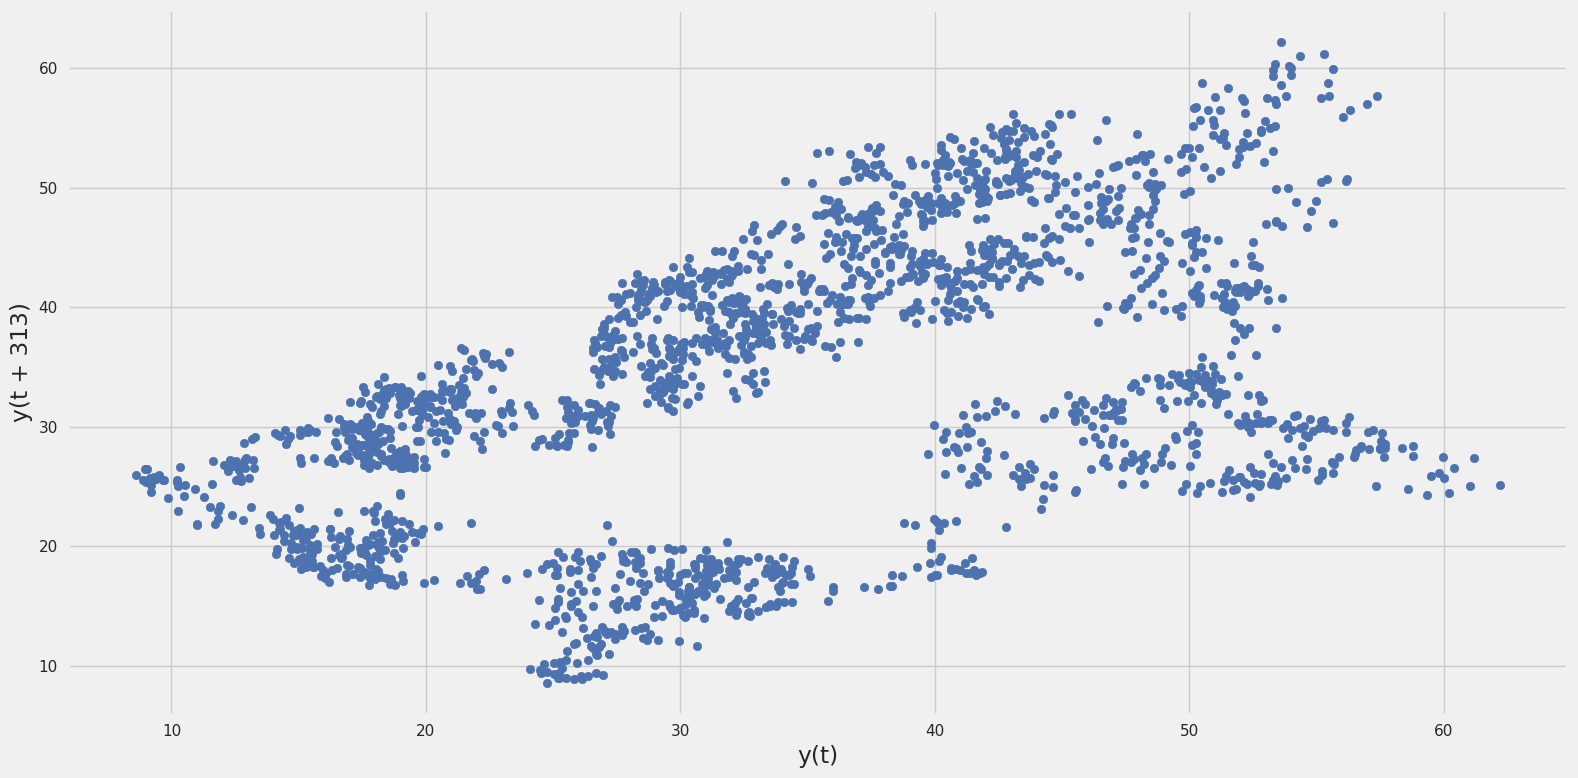

In [ ]:
img_df_vale3_autocorr_313 = lag_plot(df_vale3_date_index['price'], lag=313)
#save_image(img=img_df_vale3_autocorr_313, name='img_df_vale3_autocorr_313')

In [ ]:
df_vale3_date_index['price'].autocorr(lag=314)


0.49925706901065026

**Up** to 313 days still have correlation.
**Lag variable visualization**

In [ ]:
df_vale3_original_lag_30 = pd.concat([df_vale3_date_index['price'],
                                     df_vale3_date_index['price'].shift(30)], axis=1)

In [ ]:
df_vale3_original_lag_30.head(50)


,adj close,adj close
date,,
2016-11-02,768.70,NaN
2016-11-03,762.13,NaN
2016-11-04,762.02,NaN
2016-11-07,782.52,NaN
2016-11-08,790.51,NaN
2016-11-09,785.31,NaN
2016-11-10,762.56,NaN
2016-11-11,754.02,NaN
2016-11-14,736.08,NaN


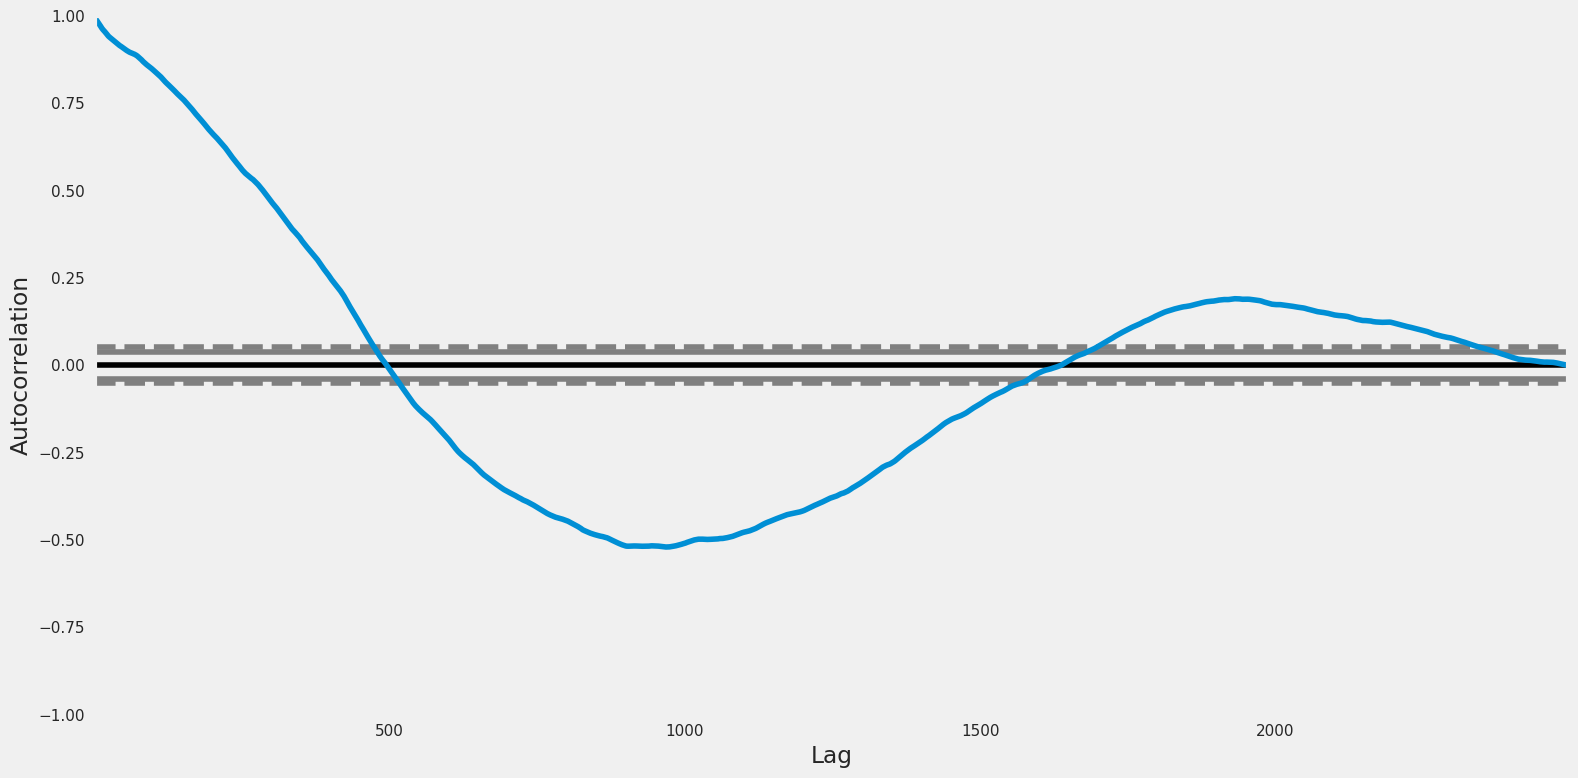

In [ ]:
img_df_vale3_autocorr_time = autocorrelation_plot(df_vale3_date_index['price'])
#save_image(img=img_df_vale3_autocorr_time, name='img_df_vale3_autocorr_time')

The confidence intervals are 95% and 99% suggesting that correlation values outside this range are most likely a correlation and not a statistical fluke.



**Stationarity**

It is necessary to ensure that the data is stationary. It means that the time series behaves over time and has a high probability of following this same behavior in the future.

Visually, the series is not stationary. To guarantee the behavior of this series, I will plot the roll statistics (ma, var) and perform the Dickey-Fuller test.

So in this test I evaluate two hypotheses:

-Null hypothesis (H0): is not stationary. It has some time-dependent structure.


-Alternative hypothesis (H1): is stationary. It has no time-dependent structure.

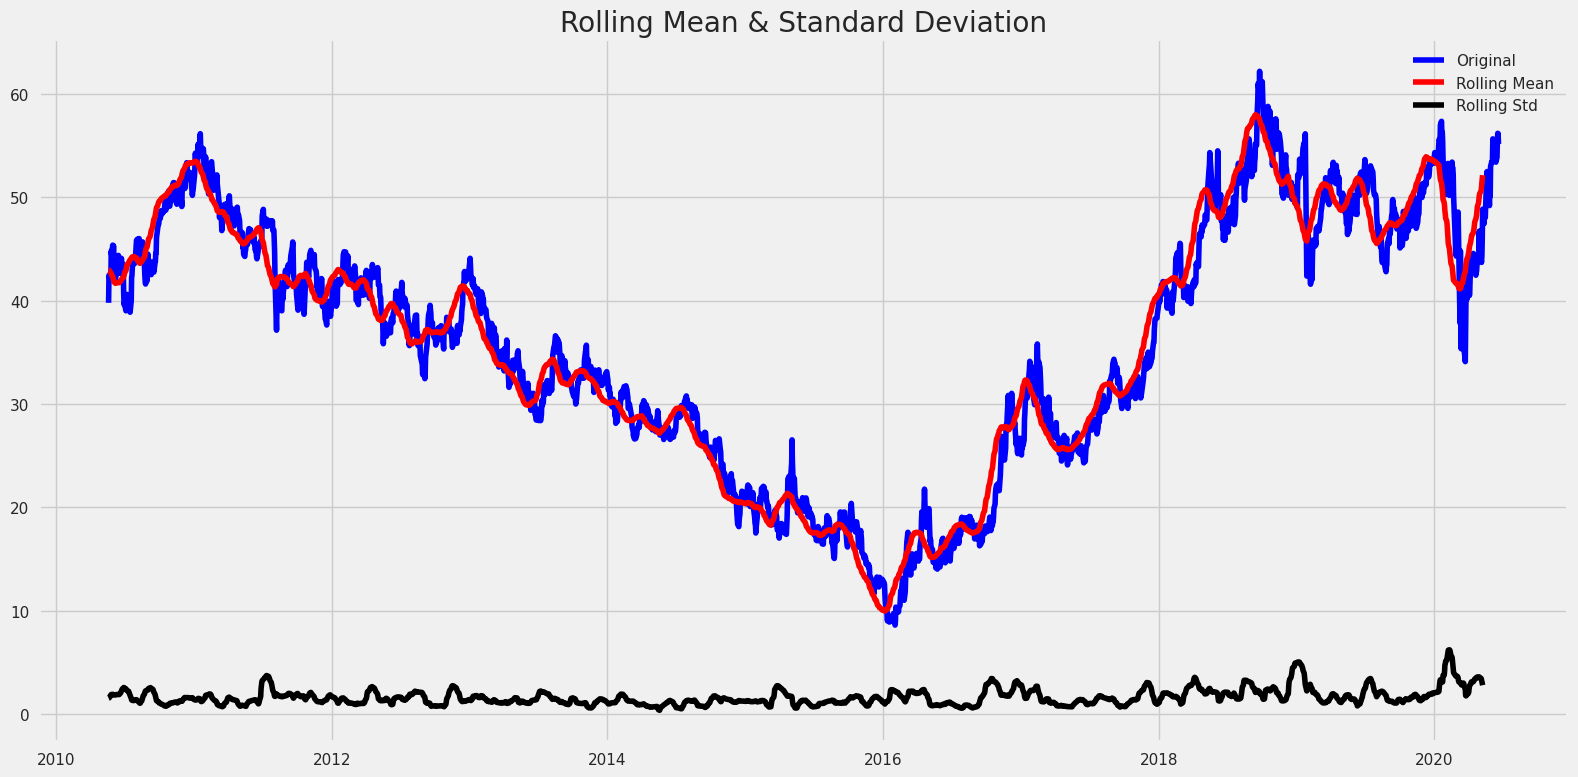

Results of Dickey-Fuller Test:
Test Statistic                  -1.51
p-value                          0.53
Lags Used                       27.00
Number of Observations Used   2467.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [ ]:
def test_stationarity(timeseries):

    # determing rolling statistics
    rolmean = timeseries.rolling(window=30, center=False).mean()
    rolstd  = timeseries.rolling(window=30, center=False).std()

    # plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)


    # perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag=None)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
test_stationarity(df_vale3['price'])


**NOTES**

Used autolag='AIC' for the function itself to determine the lag, choosing the lowest observed value.


**Test Statistic > Critical Value (1%)**, then H0 is accepted, that is, there is no stationarity in the explored ST


In this case it is necessary to leave the ST stationary!


**Stationarity by Decomposition**

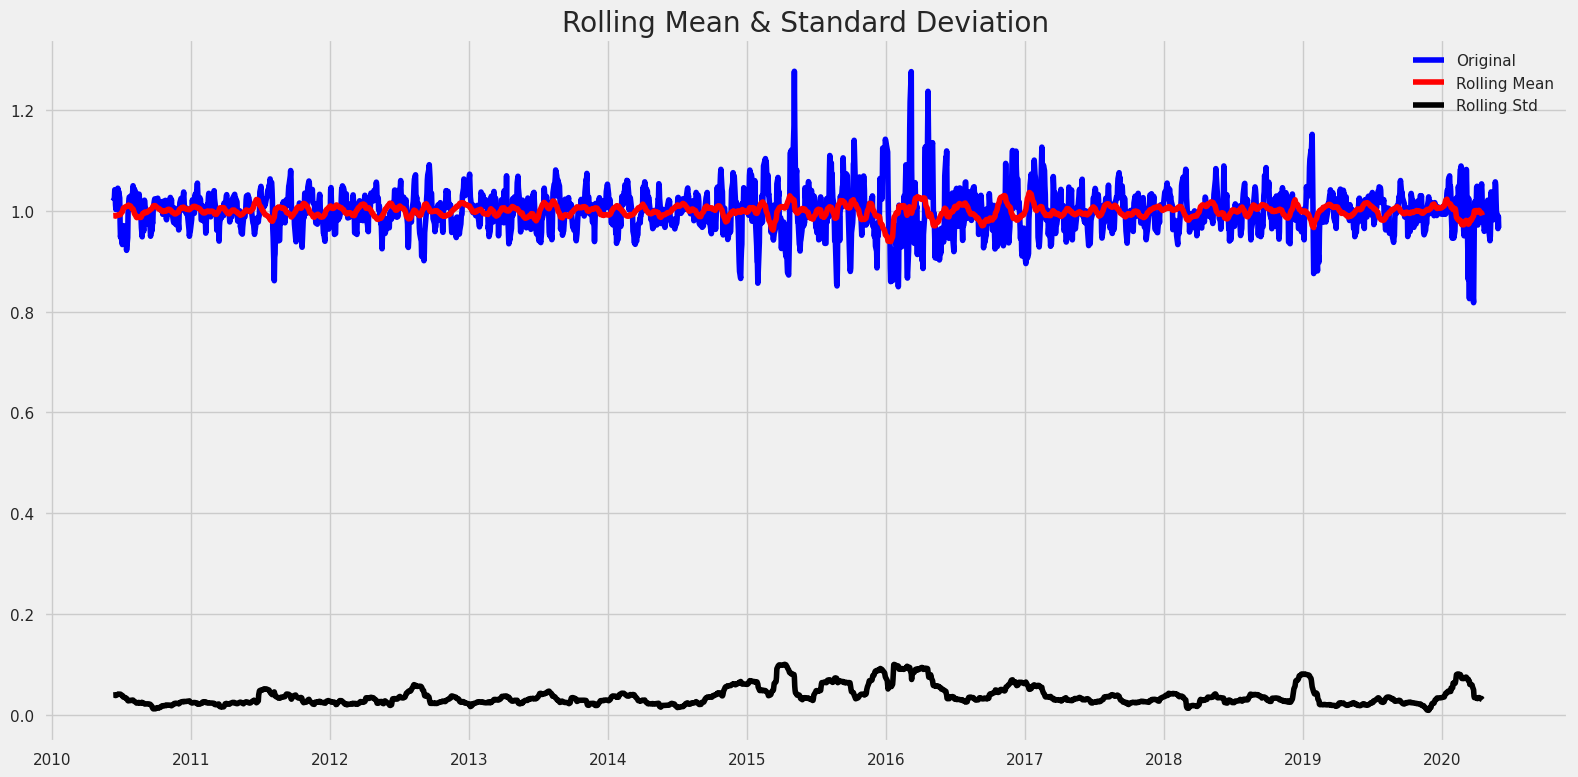

Results of Dickey-Fuller Test:
Test Statistic                 -12.42
p-value                          0.00
Lags Used                       27.00
Number of Observations Used   2437.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64


In [ ]:
residual
residual.dropna(inplace=True)
test_stationarity(residual)

**Data Preparation: Feature Engineering**

In [ ]:
cols = ['data', 'price', 'residue', 'trend', 'seasonality']
df = pd.DataFrame(columns=cols)
df.head()


,data,price,residue,trend,seasonality


In [ ]:
df['data'] = df_vale3['date']
df.head()

,data,price,residue,trend,seasonality
date,,,,,
2020-06-19,2020-06-19,NaN,NaN,NaN,NaN
2020-06-18,2020-06-18,NaN,NaN,NaN,NaN
2020-06-17,2020-06-17,NaN,NaN,NaN,NaN
2020-06-16,2020-06-16,NaN,NaN,NaN,NaN
2020-06-15,2020-06-15,NaN,NaN,NaN,NaN


In [ ]:
df['price'] = df_vale3['price']
df.head()

,data,price,residue,trend,seasonality
date,,,,,
2020-06-19,2020-06-19,55.17,NaN,NaN,NaN
2020-06-18,2020-06-18,56.17,NaN,NaN,NaN
2020-06-17,2020-06-17,56.20,NaN,NaN,NaN
2020-06-16,2020-06-16,55.39,NaN,NaN,NaN
2020-06-15,2020-06-15,53.88,NaN,NaN,NaN


In [ ]:

df['trend'] = trend.values
df.head(20)


,data,price,residue,trend,seasonality
date,,,,,
2020-06-19,2020-06-19,55.17,NaN,NaN,NaN
2020-06-18,2020-06-18,56.17,NaN,NaN,NaN
2020-06-17,2020-06-17,56.20,NaN,NaN,NaN
2020-06-16,2020-06-16,55.39,NaN,NaN,NaN
2020-06-15,2020-06-15,53.88,NaN,NaN,NaN
2020-06-12,2020-06-12,53.40,NaN,NaN,NaN
2020-06-10,2020-06-10,54.20,NaN,NaN,NaN
2020-06-09,2020-06-09,54.99,NaN,NaN,NaN
2020-06-08,2020-06-08,54.78,NaN,NaN,NaN


In [ ]:
df['seasonality'] = seasonal.values
df.head(20)

,data,price,residue,trend,seasonality
date,,,,,
2020-06-19,2020-06-19,55.17,NaN,NaN,1.00
2020-06-18,2020-06-18,56.17,NaN,NaN,1.00
2020-06-17,2020-06-17,56.20,NaN,NaN,1.00
2020-06-16,2020-06-16,55.39,NaN,NaN,1.00
2020-06-15,2020-06-15,53.88,NaN,NaN,1.00
2020-06-12,2020-06-12,53.40,NaN,NaN,1.00
2020-06-10,2020-06-10,54.20,NaN,NaN,1.00
2020-06-09,2020-06-09,54.99,NaN,NaN,1.00
2020-06-08,2020-06-08,54.78,NaN,NaN,1.00


In [ ]:
residuos = residual.values
df = df[30:]
df['residue'] = residuos
df.head()

,data,price,residue,trend,seasonality
date,,,,,
2020-05-07,2020-05-07,46.05,0.97,46.83,1.00
2020-05-06,2020-05-06,44.33,0.99,46.64,1.00
2020-05-05,2020-05-05,43.70,0.96,46.44,1.00
2020-05-04,2020-05-04,43.93,0.99,46.23,1.00
2020-04-30,2020-04-30,44.86,1.00,46.01,1.00


In [ ]:
df['diff_1'] = df['price'].diff(periods=1)
df['diff_2'] = df['price'].diff(periods=2)
df['diff_3'] = df['price'].diff(periods=3)
df['diff_4'] = df['price'].diff(periods=4)
df['diff_5'] = df['price'].diff(periods=5)

df.dropna(inplace=True)
df.head(10)


,data,price,residue,trend,seasonality,diff_1,diff_2,diff_3,diff_4,diff_5
date,,,,,,,,,,
2020-04-29,2020-04-29,46.73,1.02,45.77,1.00,1.87,2.80,3.03,2.40,0.68
2020-04-28,2020-04-28,44.61,1.05,45.44,1.00,-2.12,-0.25,0.68,0.91,0.28
2020-04-27,2020-04-27,44.55,1.06,45.07,1.00,-0.06,-2.18,-0.31,0.62,0.85
2020-04-24,2020-04-24,43.76,1.04,44.78,1.00,-0.79,-0.85,-2.97,-1.10,-0.17
2020-04-23,2020-04-23,43.51,0.98,44.57,1.01,-0.25,-1.04,-1.10,-3.22,-1.35
2020-04-22,2020-04-22,42.90,0.99,44.38,1.00,-0.61,-0.86,-1.65,-1.71,-3.83
2020-04-20,2020-04-20,42.46,1.01,44.14,1.00,-0.44,-1.05,-1.30,-2.09,-2.15
2020-04-17,2020-04-17,44.00,0.99,43.91,1.00,1.54,1.10,0.49,0.24,-0.55
2020-04-16,2020-04-16,42.76,1.01,43.70,1.00,-1.24,0.30,-0.14,-0.75,-1.00


In [ ]:
def save_data_cleansing(df: pd.core.frame.DataFrame,
                       path: str = '') -> None:
    df.to_csv(path_or_buf = path,
              sep = ',',
              index = False,
              encoding = 'utf8')

    return "saved data!"


In [ ]:
save_data_cleansing(df = df, path = 'df_vale3_cleansing.csv')

'saved data!'

In [ ]:
pip install pmdarima


**Econometric Models**


This notebook has the following statistical models:

AIR


ARIMA


SARIMA


**Prepare Environment**

In [ ]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# statsmodels
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm

# autoarima
import pmdarima as pm

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import itertools
import os

**Prepare Principal Directory**


In [ ]:

def path_to_work(end_directory: str='notebooks'):
    curr_dir = os.path.dirname(os.path.realpath ("__file__"))

    if curr_dir.endswith(end_directory):
        os.chdir('..')
        return f'Change directory to: {curr_dir}'

    return f'Current working directory: {curr_dir}'

In [ ]:
path_to_work('notebooks')


'Current working directory: /content'

In [ ]:
%matplotlib inline

# Load the "autoreload" extension so that code can change
%load_ext autoreload

# ----------
# Plot
# ----------
# graph style
sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

# ----------
# Seaborn rcParams
# ----------
rc={'savefig.dpi': 500,
    'figure.autolayout': True,
    'figure.figsize': [17, 12],
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'font.size': 10,
    'lines.linewidth': 1.0,
    'lines.markersize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15}

sns.set(context='notebook',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True,
        rc=rc)

# ----------
# Pandas
# ----------
# Floating point
pd.options.display.float_format = '{:.2f}'.format

# Print xxxx rows and all columns
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', None)

# ----------
# Python
# ----------
# pretty print
pp = pprint.PrettyPrinter(indent=4)

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')
plt.style.use('seaborn')  # fivethirtyeight
plt.rc('figure',figsize=(16,8))
plt.rc('font',size=15)
plt.rc('legend',fontsize=15)

# Seaborn rcParams
# ===================
sns.set(context='poster',  # notebook
        style='darkgrid',
        palette='deep',
        color_codes=True)

# graph style
sns.set(style='dark', palette='deep')

plt.style.use('fivethirtyeight')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Load data**

In [ ]:
df_vale3 = pd.read_csv('df_vale3_cleansing.csv',
                              encoding='utf8',
                              delimiter=',',
                              parse_dates=True,
                              index_col=0,
                              verbose=True)

Tokenization took: 4.03 ms
Type conversion took: 4.21 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df_vale3.head()


,price,residue,trend,seasonality,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2010-07-12,40.00,1.00,41.83,1.00,-0.60,-0.46,0.49,0.98,0.42
2010-07-13,40.07,1.04,41.91,1.00,0.07,-0.53,-0.39,0.56,1.05
2010-07-14,40.08,1.03,41.98,1.00,0.01,0.08,-0.52,-0.38,0.57
2010-07-15,39.76,1.04,42.05,1.00,-0.32,-0.31,-0.24,-0.84,-0.70
2010-07-16,38.88,1.03,42.12,1.00,-0.88,-1.20,-1.19,-1.12,-1.72


In [ ]:
size_train = 2132
size_test = 313
print(size_train)
print(size_test)

df_train = df_vale3['price'].iloc[:size_train]
df_test = df_vale3['price'].iloc[size_train:]

2132
313


In [ ]:
df_train.tail()


data
2019-02-15   45.88
2019-02-18   45.25
2019-02-19   45.49
2019-02-20   45.80
2019-02-21   45.38
Name: price, dtype: float64

Text(0.5, 1.0, 'Size training = 2132')

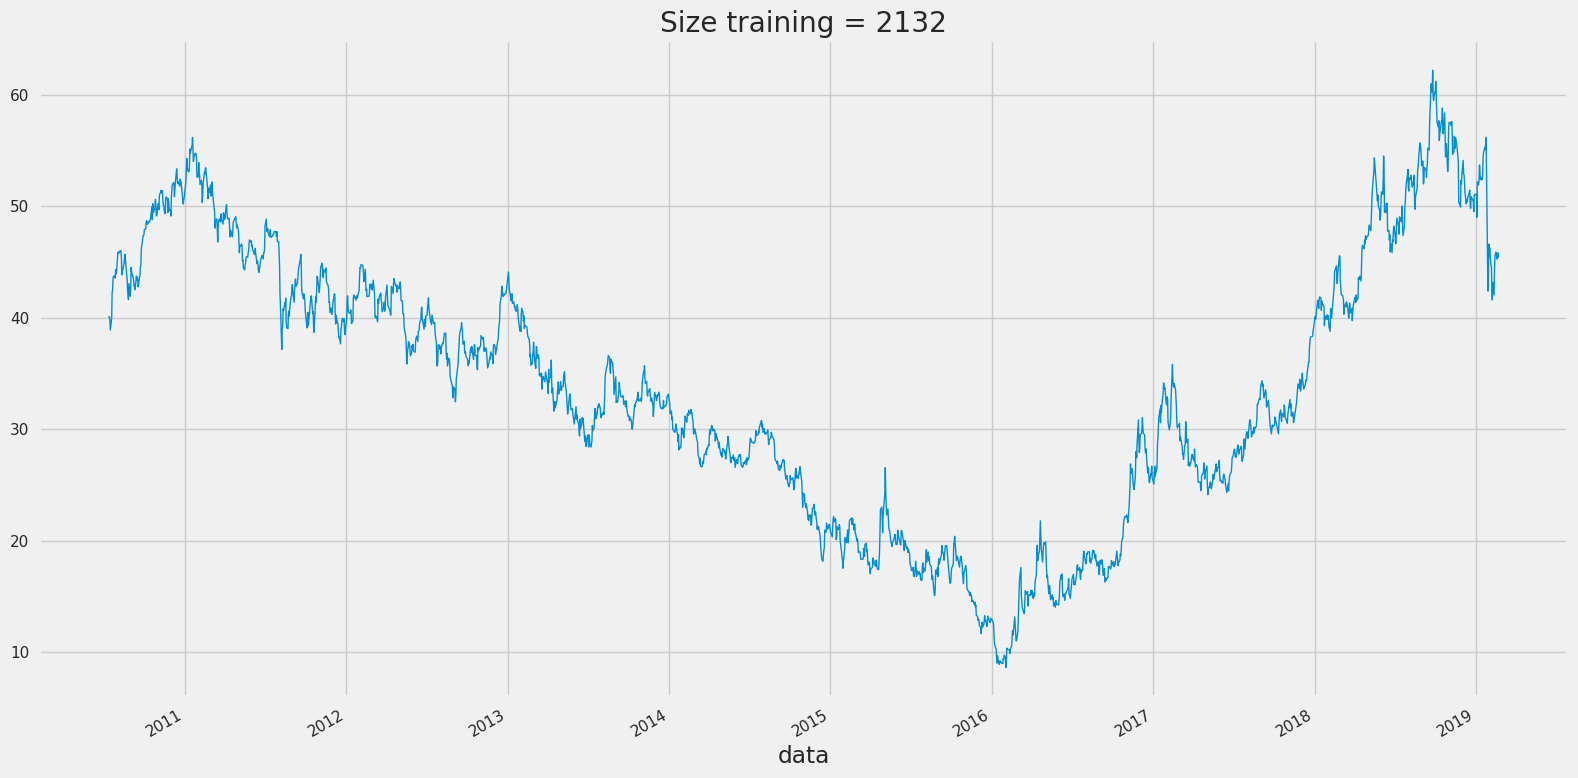

In [ ]:
df_train.plot(linewidth=1)
plt.grid(True)
plt.title(f'Size training = {len(df_train)}')

In [ ]:
df_test.head()


data
2019-02-22   46.99
2019-02-25   47.12
2019-02-26   47.20
2019-02-27   46.83
2019-02-28   47.10
Name: price, dtype: float64

Text(0.5, 1.0, 'Size training = 313')

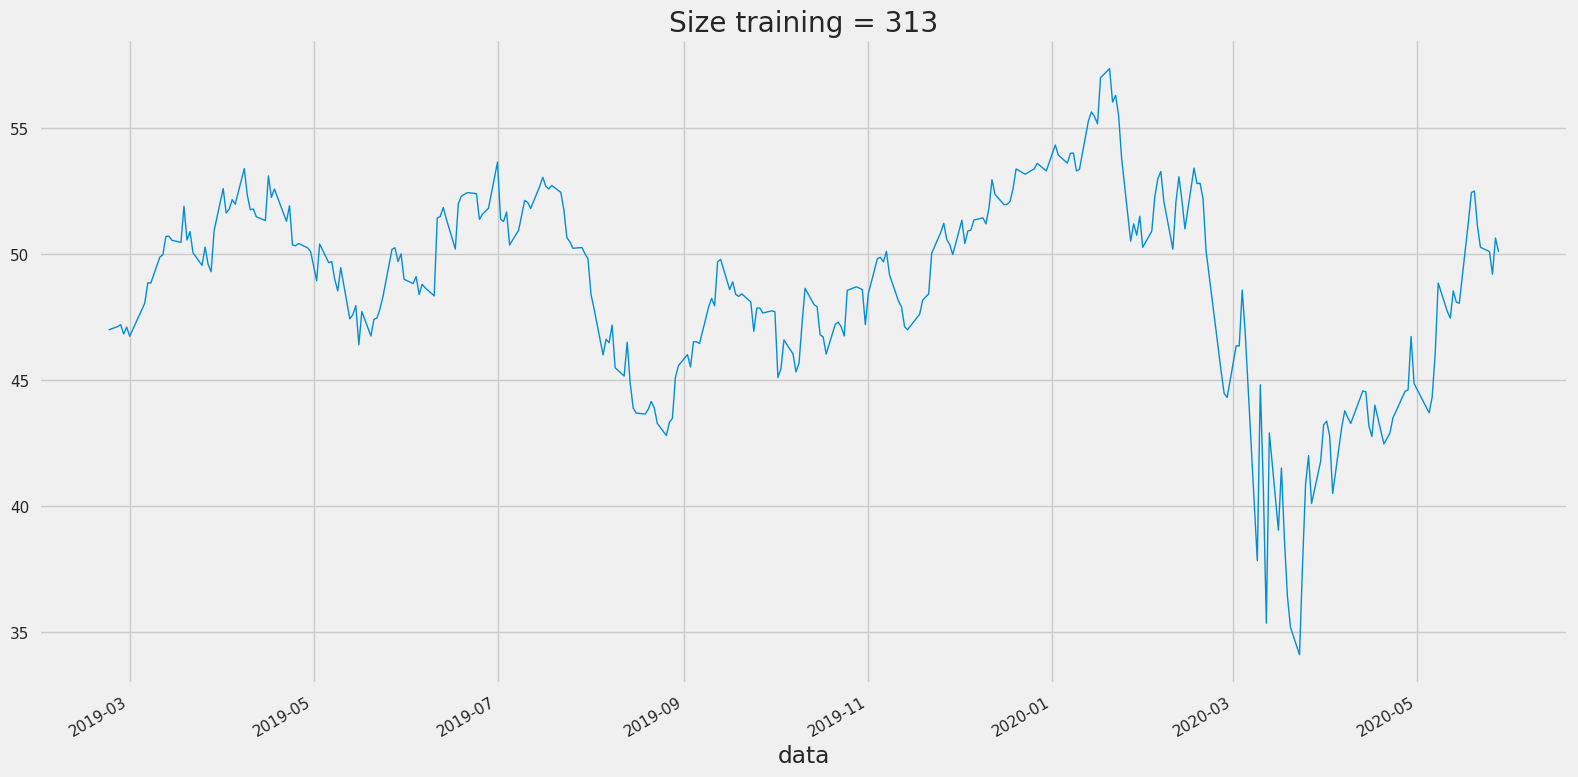

In [ ]:
df_test.plot(linewidth=1)
plt.grid(True)
plt.title(f'Size training = {len(df_test)}')

**Index manipulation**

In [ ]:
df_train.index


DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21'],
              dtype='datetime64[ns]', name='data', length=2132, freq=None)

In [ ]:
df_test.index


DatetimeIndex(['2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='data', length=313, freq=None)

In [ ]:
df_train.reset_index(drop=True, inplace=True)
df_train.index

RangeIndex(start=0, stop=2132, step=1)

In [ ]:
df_test.reset_index(drop=True, inplace=True)
df_test.index

RangeIndex(start=0, stop=313, step=1)

In [ ]:
df_train.index = pd.RangeIndex(start=0, stop=len(df_train), step=1)
df_train.index

RangeIndex(start=0, stop=2132, step=1)

In [ ]:
df_test.index = pd.RangeIndex(start=2132, stop=len(df_vale3), step=1)
df_test.index

RangeIndex(start=2132, stop=2445, step=1)

**Display Results**

In [ ]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['predict'])
    #mape = mean_absolute_percentage_error(df_test, y_forecast)
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100

    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]

    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Time day", fontsize=20)
    plt.ylabel("Price ($)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

**Grid Search**

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0, 3)

# Generate all different combinations of p, q and q triplets
list_pdq = list(itertools.product(p, d, q))
print(f'All different combinations of p, q and q:\n {list_pdq}')

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print(f'\n\nAll different combinations of seasonal p, q and q:\n {seasonal_pdq}')

All different combinations of p, q and q:
 [(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


All different combinations of seasonal p, q and q:
 [(0, 0, 0, 12), (0, 0, 1, 12), (0, 0, 2, 12), (0, 1, 0, 12), (0, 1, 1, 12), (0, 1, 2, 12), (0, 2, 0, 12), (0, 2, 1, 12), (0, 2, 2, 12), (1, 0, 0, 12), (1, 0, 1, 12), (1, 0, 2, 12), (1, 1, 0, 12), (1, 1, 1, 12), (1, 1, 2, 12), (1, 2, 0, 12), (1, 2, 1, 12), (1, 2, 2, 12), (2, 0, 0, 12), (2, 0, 1, 12), (2, 0, 2, 12), (2, 1, 0, 12), (2, 1, 1, 12), (2, 1, 2, 12), (2, 2, 0, 12), (2, 2, 1, 12), (2, 2, 2, 12)]


In [ ]:
def search_best_params_arima_model(df_train: 'Dataframe', pdq: list) -> list:
    best_model = 99999
    best_params = (0, 0, 0)
    param = ()

    for param in pdq:
        try:
            arima_model = ARIMA(df_train, order=param)
            results = arima_model.fit()
            print(f'pdq = {param} | AIC = {results.aic}')

            if results.aic < best_model:
                best_model = results.aic
                best_params = param
        except:
            continue

    print(f'best ARIMA: {best_params} | AIC:{best_model}')
    return [best_params, best_model]

In [ ]:
def search_best_params_sarima_model(df_train, trend, pdq):
    best_model = 99999
    best_param_seasonal = ()
    param = ()
    param_seasonal = ()

    for param_seasonal in seasonal_pdq:
        try:
            sarima_model = SARIMAX(df_train,
                                   order=pdq,
                                   seasonal_order=param_seasonal,
                                   trend=trend,
                                   enforce_stationarity=True,
                                   enforce_invertibility=False)
            results = sarima_model.fit()
            print(f'pdq = {pdq} | param_seasonal = {param_seasonal} | AIC = {results.aic}')

            if results.aic < best_model:
                best_model = results.aic
                best_param_seasonal = param_seasonal
        except:
            continue

    print(f'\n\nBest SARIMA: {pdq}x{param_seasonal}12 | AIC:{best_model}')
    return [best_param_seasonal, best_model]

**Modeling**

**Build Model**

**Statistical Models**
AR

A ST is not stationary

There is no trend, (trend='n')

No seasonality, (seasonal=False) within 30 days

In [ ]:
dict_results = {}


In [ ]:
ar_model = AutoReg(df_train,
                   lags=313,
                   trend='n',
                   seasonal=False,
                   period=len(df_test))
ar_fit = ar_model.fit()

In [ ]:
# forecast
y_ar_forecast = ar_fit.predict(start=(df_test.index[0]), end=df_test.index[-1])

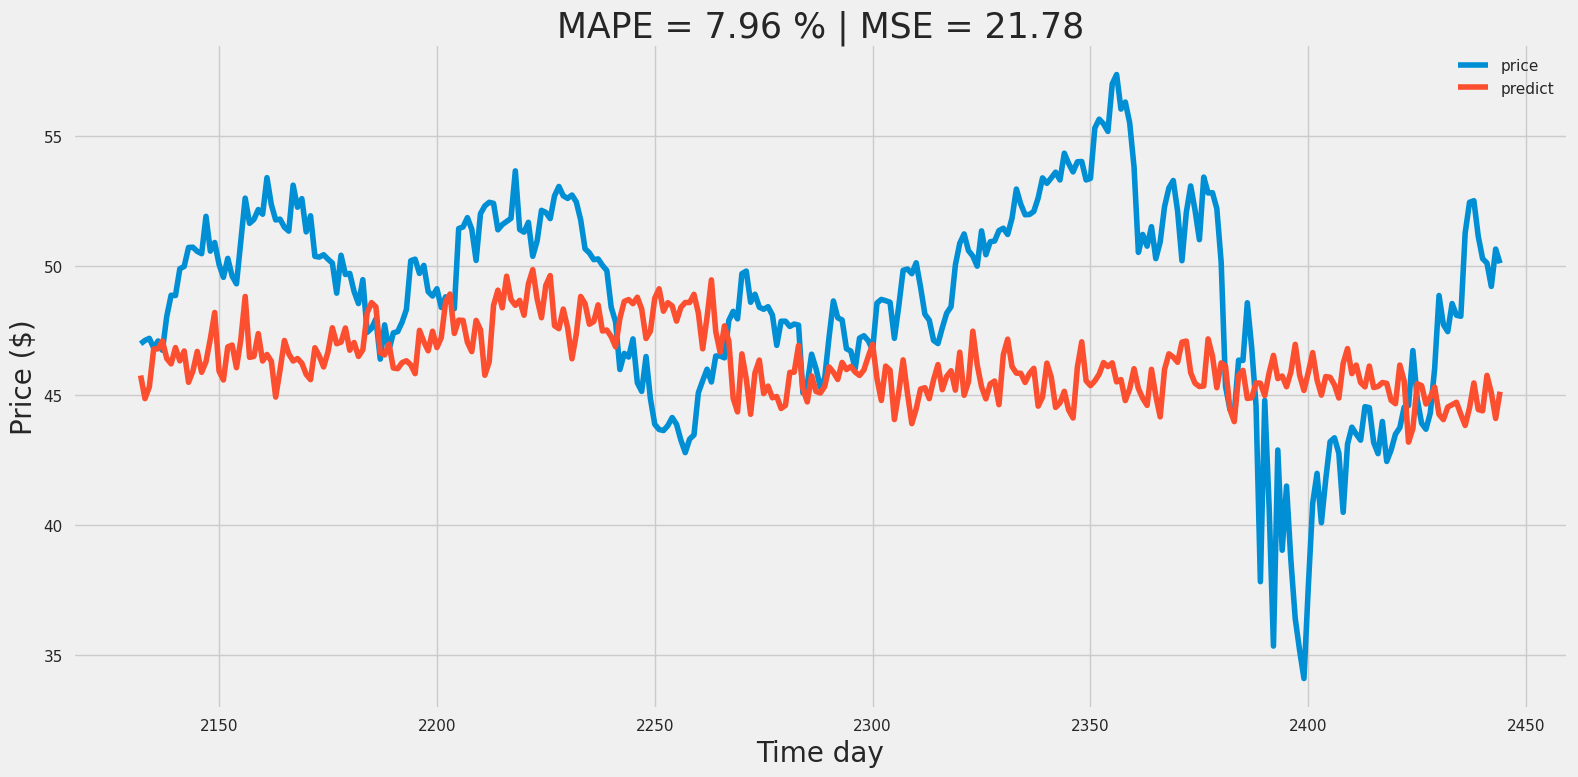

In [ ]:
show_result_model(df_train=df_train,
                  df_test=df_test,
                  y_forecast=y_ar_forecast,
                  model_name='ar_model')

**ARIMA**

In [ ]:
%%time

list_order_arima = search_best_params_arima_model(df_train=df_train,
                                                  pdq=list_pdq)
print(list_order_arima)

best ARIMA: (0, 0, 0) | AIC:99999
[(0, 0, 0), 99999]
CPU times: user 2.67 ms, sys: 0 ns, total: 2.67 ms
Wall time: 5.44 ms


In [ ]:
autoarima_model = pm.auto_arima(df_train,
                                stepwise=True,
                                suppress_warnings=True,
                                error_action="ignore",
                                information_criterion='aic',
                                start_p=2,
                                start_d=1,
                                start_q=2,
                                lags=116,
                                seasonal=False,
                                trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5189.626, Time=7.00 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5202.401, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5202.744, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5202.427, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5200.421, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5191.786, Time=1.13 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5192.782, Time=2.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5191.420, Time=4.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5191.381, Time=5.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5195.793, Time=1.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5189.941, Time=4.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5194.800, Time=0.61 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=5193.582, Time=3.91 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=5187.657, Time=0.83 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [ ]:
print(autoarima_model.order)
print(autoarima_model.aic())

(2, 1, 2)
5187.656934969115


In [ ]:
autoarima_model_fit = autoarima_model.fit(y=df_train)
autoarima_model_fit

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# forecast
y_forecast = autoarima_model_fit.predict(n_periods=len(df_test[:313]))
len(y_forecast)

313

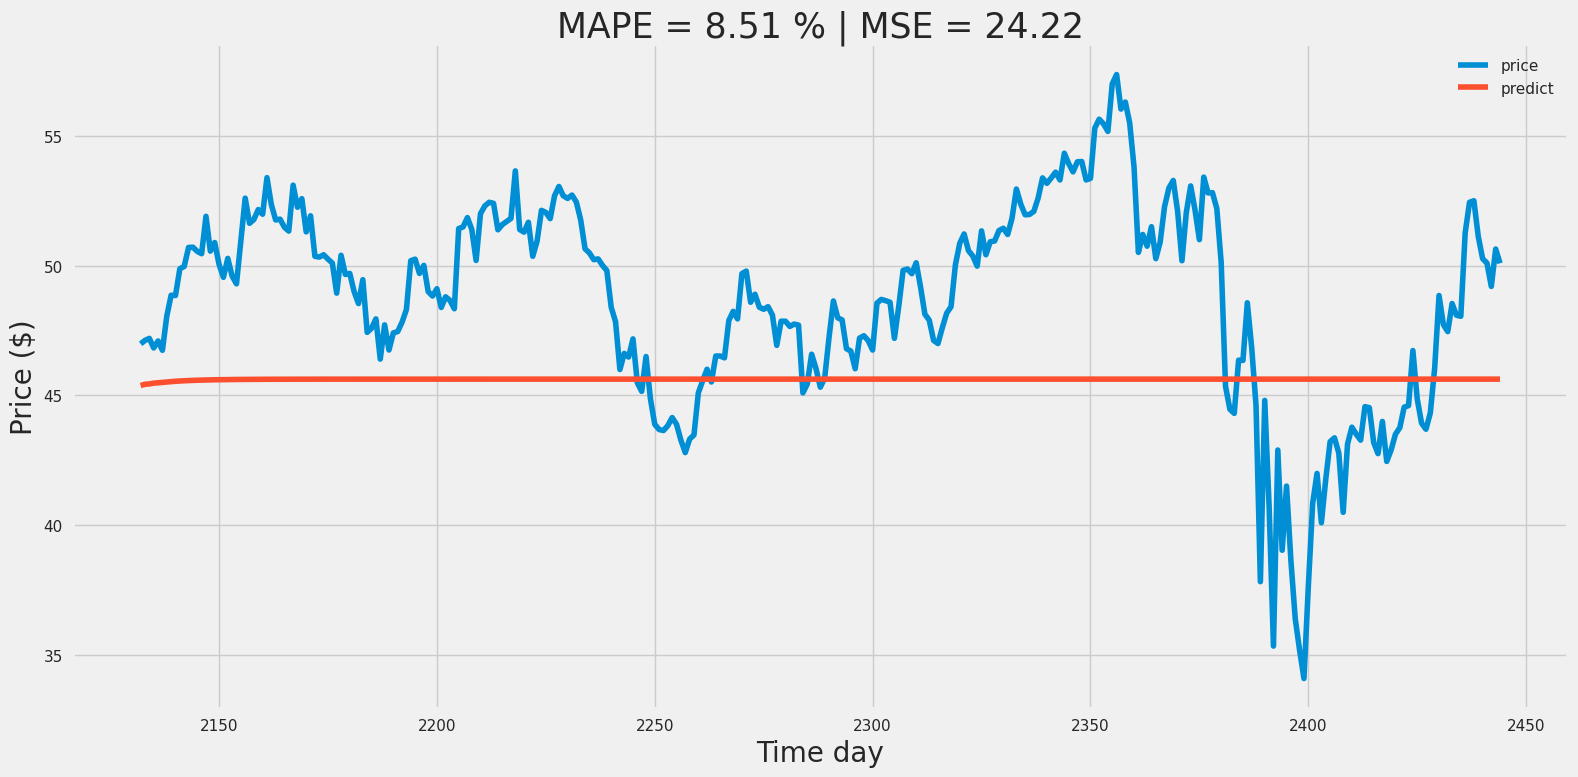

In [ ]:
show_result_model(df_train=df_train,
                  df_test=df_test,
                  y_forecast=y_forecast,
                  model_name='arima_model')

**SARIMA**
**Machine Learning Models**
This notebook has the following machine learning models compared:

**Random Forest**


**SVM**

In [ ]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Other
from IPython.display import Image
import warnings
import pprint
import datetime
import os

In [ ]:
df_vale3 = pd.read_csv('df_vale3_cleansing.csv',
                        encoding='utf8',
                        delimiter=',',
                        parse_dates=True,
                        index_col=0,
                        verbose=True)

Tokenization took: 5.23 ms
Type conversion took: 3.98 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
print(df_vale3.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2445 entries, 2010-07-12 to 2020-05-28
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        2445 non-null   float64
 1   residue      2445 non-null   float64
 2   trend        2445 non-null   float64
 3   seasonality  2445 non-null   float64
 4   diff_1       2445 non-null   float64
 5   diff_2       2445 non-null   float64
 6   diff_3       2445 non-null   float64
 7   diff_4       2445 non-null   float64
 8   diff_5       2445 non-null   float64
dtypes: float64(9)
memory usage: 191.0 KB
None


In [ ]:
df_vale3.head()

,price,residue,trend,seasonality,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2010-07-12,40.00,1.00,41.83,1.00,-0.60,-0.46,0.49,0.98,0.42
2010-07-13,40.07,1.04,41.91,1.00,0.07,-0.53,-0.39,0.56,1.05
2010-07-14,40.08,1.03,41.98,1.00,0.01,0.08,-0.52,-0.38,0.57
2010-07-15,39.76,1.04,42.05,1.00,-0.32,-0.31,-0.24,-0.84,-0.70
2010-07-16,38.88,1.03,42.12,1.00,-0.88,-1.20,-1.19,-1.12,-1.72


**Split Data**

In [ ]:
size_train = 2132
size_test = 313
print(size_train)
print(size_test)

df_train = df_vale3.iloc[:size_train]
df_test = df_vale3.iloc[size_train:]
print(df_train.columns)
print(df_test.columns)

2132
313
Index(['price', 'residue', 'trend', 'seasonality', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')
Index(['price', 'residue', 'trend', 'seasonality', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')


In [ ]:
df_vale3_without_target = df_train.columns
df_vale3_without_target = df_vale3_without_target.drop('price')

print(df_vale3_without_target)

Index(['residue', 'trend', 'seasonality', 'diff_1', 'diff_2', 'diff_3',
       'diff_4', 'diff_5'],
      dtype='object')


Text(0.5, 1.0, 'Train size: 2132')

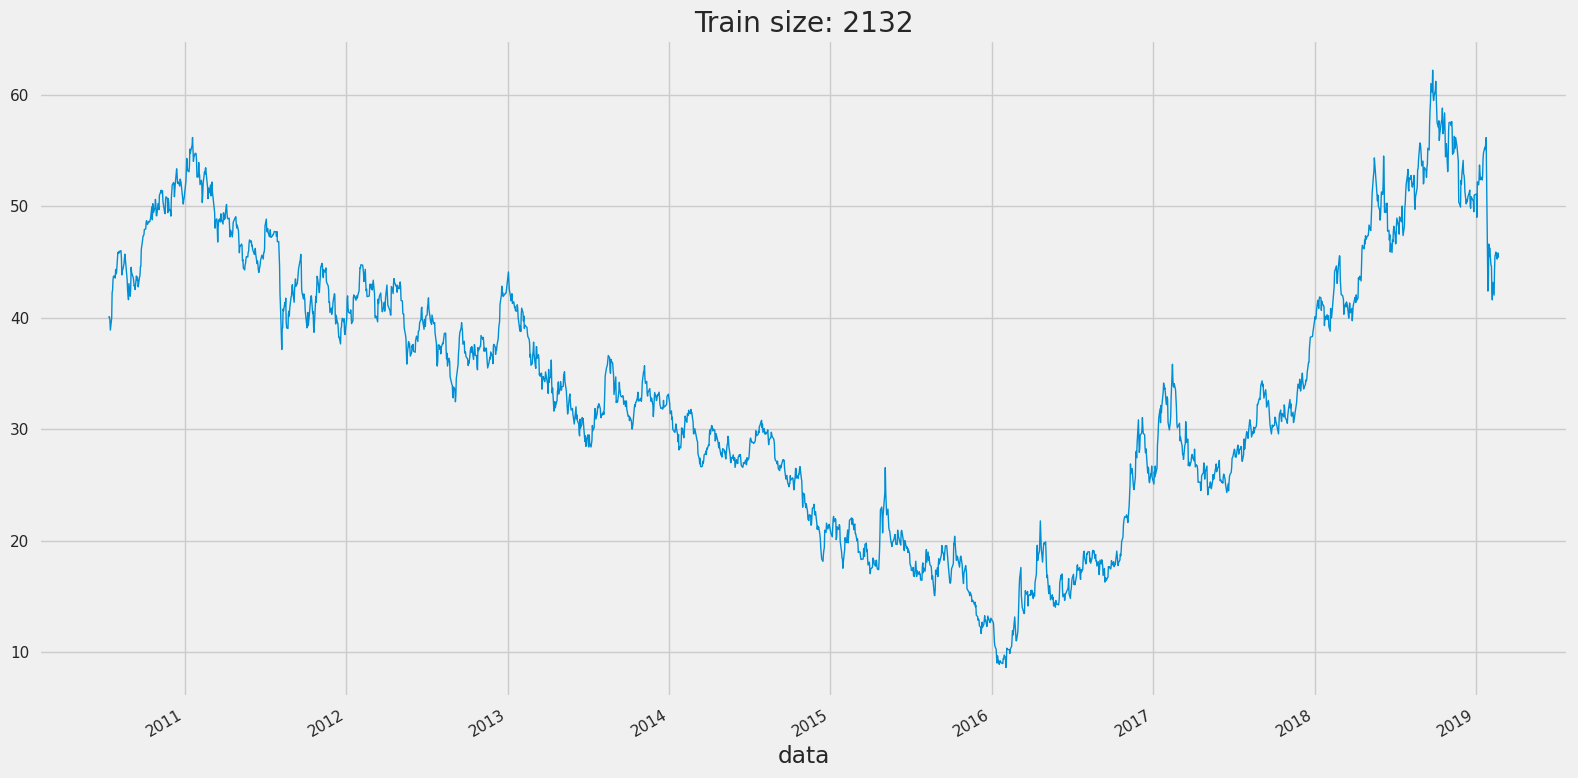

In [ ]:
df_train['price'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 313')

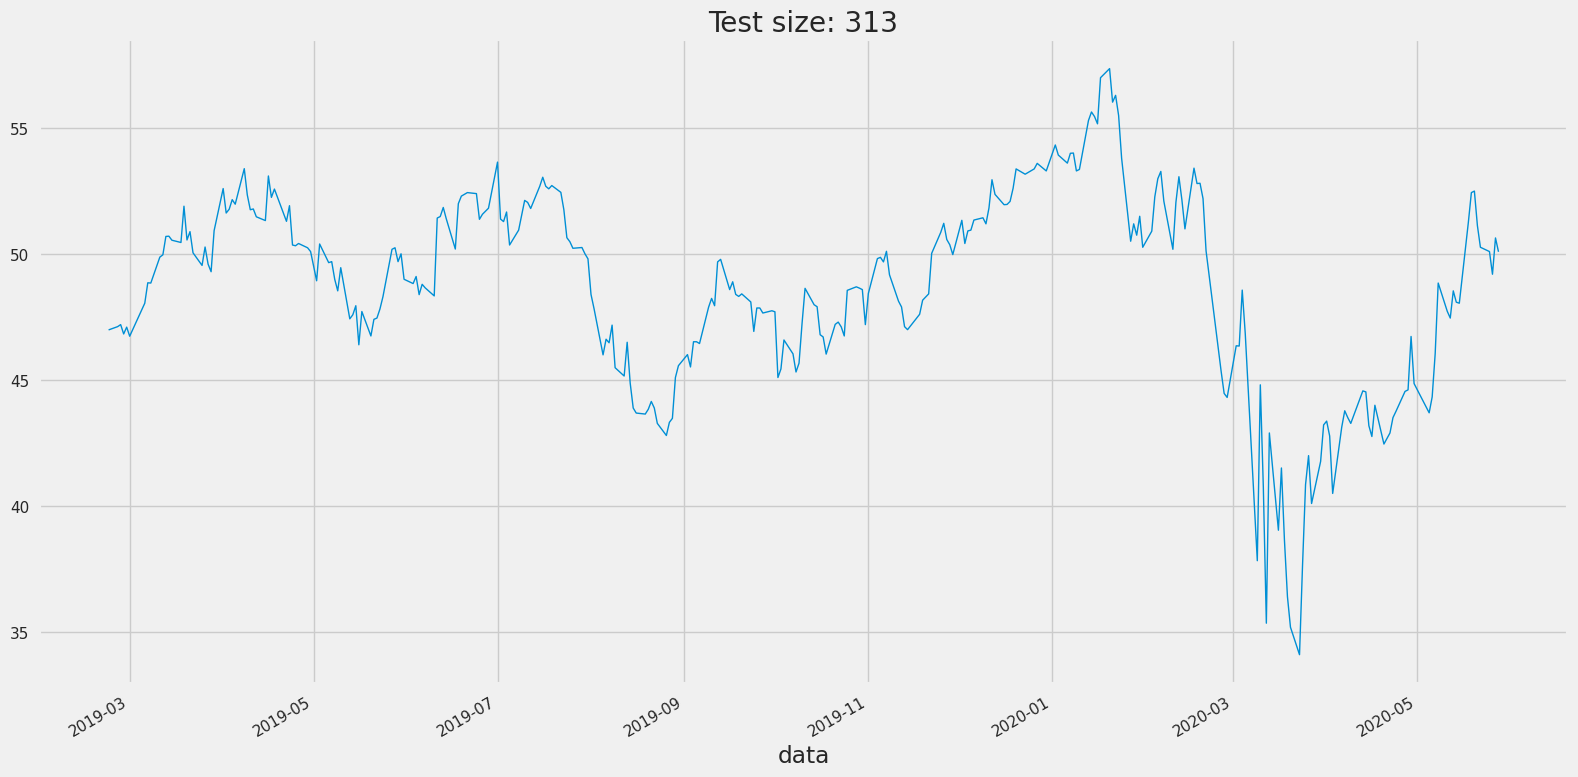

In [ ]:
df_test['price'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [ ]:
df_train.index


DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21'],
              dtype='datetime64[ns]', name='data', length=2132, freq=None)

In [ ]:
df_test.index


DatetimeIndex(['2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='data', length=313, freq=None)

In [ ]:
X_train = df_train[df_vale3_without_target]
y_train = df_train['price']
print(len(X_train))
print(len(y_train))
print(type(X_train))
print(type(y_train))
print((X_train[:5]))
print(y_train[:5])


X_train = df_train[df_vale3_without_target]
y_train = df_train['price']

2132
2132
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residue  trend  seasonality  diff_1  diff_2  diff_3  diff_4  \
data                                                                      
2010-07-12     1.00  41.83         1.00   -0.60   -0.46    0.49    0.98   
2010-07-13     1.04  41.91         1.00    0.07   -0.53   -0.39    0.56   
2010-07-14     1.03  41.98         1.00    0.01    0.08   -0.52   -0.38   
2010-07-15     1.04  42.05         1.00   -0.32   -0.31   -0.24   -0.84   
2010-07-16     1.03  42.12         1.00   -0.88   -1.20   -1.19   -1.12   

            diff_5  
data                
2010-07-12    0.42  
2010-07-13    1.05  
2010-07-14    0.57  
2010-07-15   -0.70  
2010-07-16   -1.72  
data
2010-07-12   40.00
2010-07-13   40.07
2010-07-14   40.08
2010-07-15   39.76
2010-07-16   38.88
Name: price, dtype: float64


In [ ]:
X_test = df_test[df_vale3_without_target]
y_test = df_test['price']
print(len(X_test))
print(len(y_test))
print(type(X_test))
print(type(y_test))
print(X_test[:5])
print(y_test[:5])

313
313
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
            residue  trend  seasonality  diff_1  diff_2  diff_3  diff_4  \
data                                                                      
2019-02-22     0.96  46.70         1.00    1.61    1.19    1.50    1.74   
2019-02-25     0.93  46.89         1.00    0.13    1.74    1.32    1.63   
2019-02-26     0.94  47.09         1.00    0.08    0.21    1.82    1.40   
2019-02-27     0.89  47.32         1.00   -0.37   -0.29   -0.16    1.45   
2019-02-28     0.88  47.58         1.00    0.27   -0.10   -0.02    0.11   

            diff_5  
data                
2019-02-22    1.11  
2019-02-25    1.87  
2019-02-26    1.71  
2019-02-27    1.03  
2019-02-28    1.72  
data
2019-02-22   46.99
2019-02-25   47.12
2019-02-26   47.20
2019-02-27   46.83
2019-02-28   47.10
Name: price, dtype: float64


**Evaluation**

In [ ]:
dict_results = {}


**Display Result**

In [ ]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['predict'])
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100
    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]

    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Time day", fontsize=20)
    plt.ylabel("Price ($)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)


**Modeling**

**Build Model**


**Random Forest**

In [ ]:
# RandomForest params dict
rf_params_one = {}
rf_params_one['criterion'] = 'friedman_mse'
rf_params_one['n_estimators'] = 10
rf_params_one['max_depth'] = 8
rf_params_one['max_features'] = None
rf_params_one['max_leaf_nodes'] = 63
rf_params_one['min_samples_leaf'] = 1
rf_params_one['random_state'] = 0
rf_params_one['n_jobs'] = -1 # run all process

In [ ]:
model_rf_regressor = RandomForestRegressor(**rf_params_one)
model_rf_regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=8, max_features=None,
                      max_leaf_nodes=63, n_estimators=10, n_jobs=-1,
                      random_state=0)

In [ ]:
model_rf_regressor.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=8, max_features=None,
                      max_leaf_nodes=63, n_estimators=10, n_jobs=-1,
                      random_state=0)

In [ ]:
y_pred_rf_regressor = model_rf_regressor.predict(X_test)
y_pred_rf_regressor#[:5]

array([46.65300584, 47.42759206, 48.03986429, 48.03986429, 48.13289499,
       48.13289499, 48.26429684, 48.26429684, 47.90537092, 47.90537092,
       47.90537092, 52.33748721, 51.50506502, 50.69733092, 49.63505184,
       51.98196926, 49.91463982, 51.12068387, 50.55879057, 50.42703013,
       51.3831499 , 51.10364006, 51.07765452, 52.02158138, 53.05791475,
       52.15560979, 52.48346562, 52.92388635, 51.86583007, 52.02158138,
       52.02158138, 50.99692534, 51.02653242, 50.81185097, 50.9610921 ,
       52.02158138, 51.25939137, 52.02158138, 50.55879057, 51.17280505,
       50.19634203, 50.43282252, 50.89814532, 49.54379799, 49.29878256,
       49.07720031, 49.05055637, 49.05055637, 49.05055637, 49.07720031,
       49.07720031, 49.05055637, 48.8381397 , 48.69380708, 48.74707737,
       46.90768012, 48.26429684, 47.76111797, 48.08752657, 48.26429684,
       48.26429684, 49.43725445, 52.25030751, 52.25030751, 51.74854572,
       51.51701238, 49.6214177 , 49.07720031, 49.07720031, 49.29

In [ ]:
len(y_train)


2132

In [ ]:
len(y_test)


313

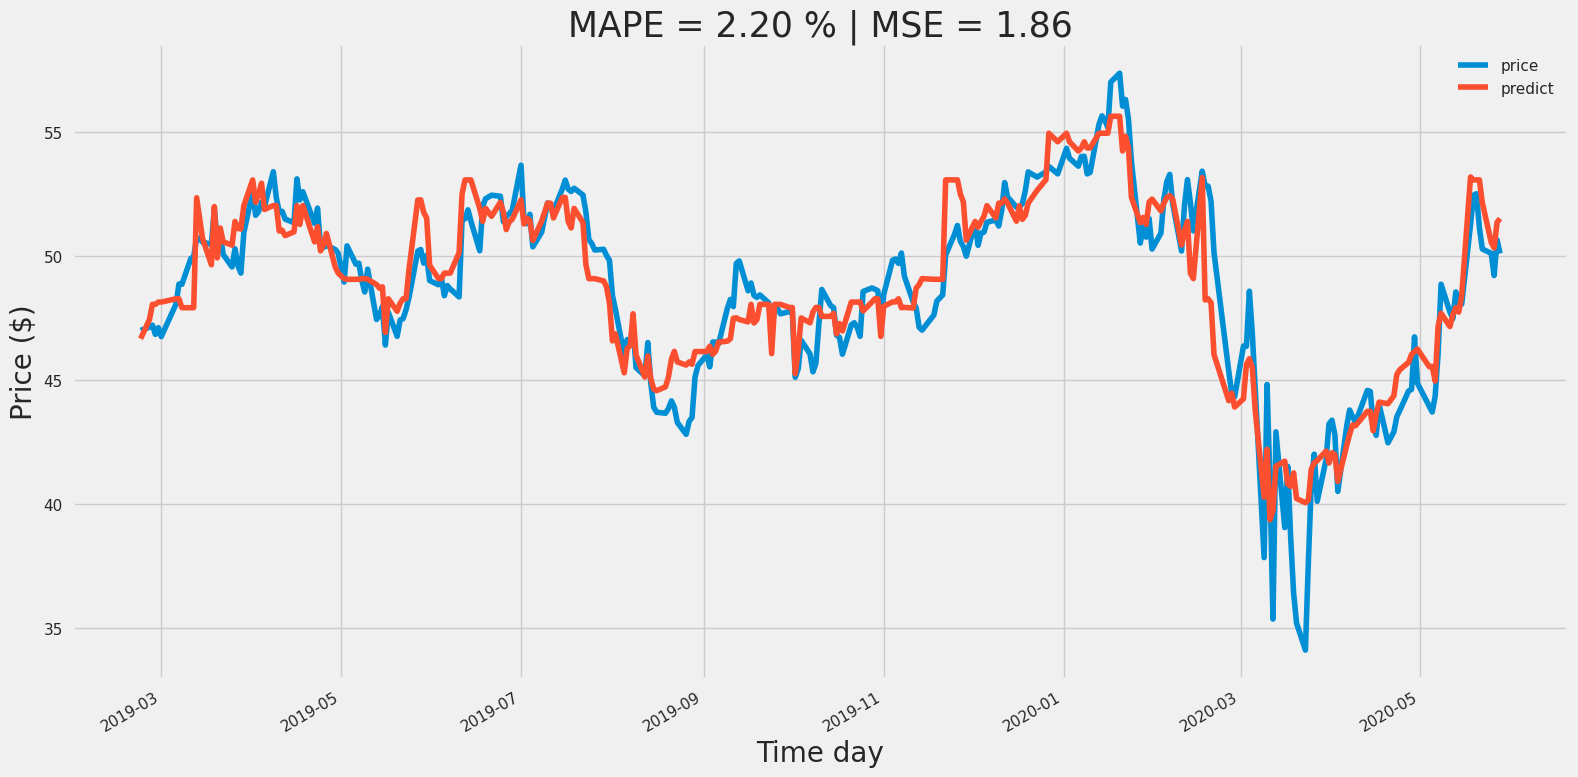

In [ ]:
show_result_model(df_train=y_train,
                  df_test=y_test,
                  y_forecast=y_pred_rf_regressor,
                  model_name='model_rf_regressor')

**SVM**

In [ ]:
model_svm_regressor = SVR(kernel='rbf', gamma= 0.1)
model_svm_regressor

SVR(gamma=0.1)

In [ ]:
model_svm_regressor.fit(X_train, y_train)


SVR(gamma=0.1)

In [ ]:
y_pred_svm_regressor = model_svm_regressor.predict(X_test)
y_pred_svm_regressor[:5]

array([45.99084802, 47.55431383, 47.58521492, 47.0727281 , 47.54548022])

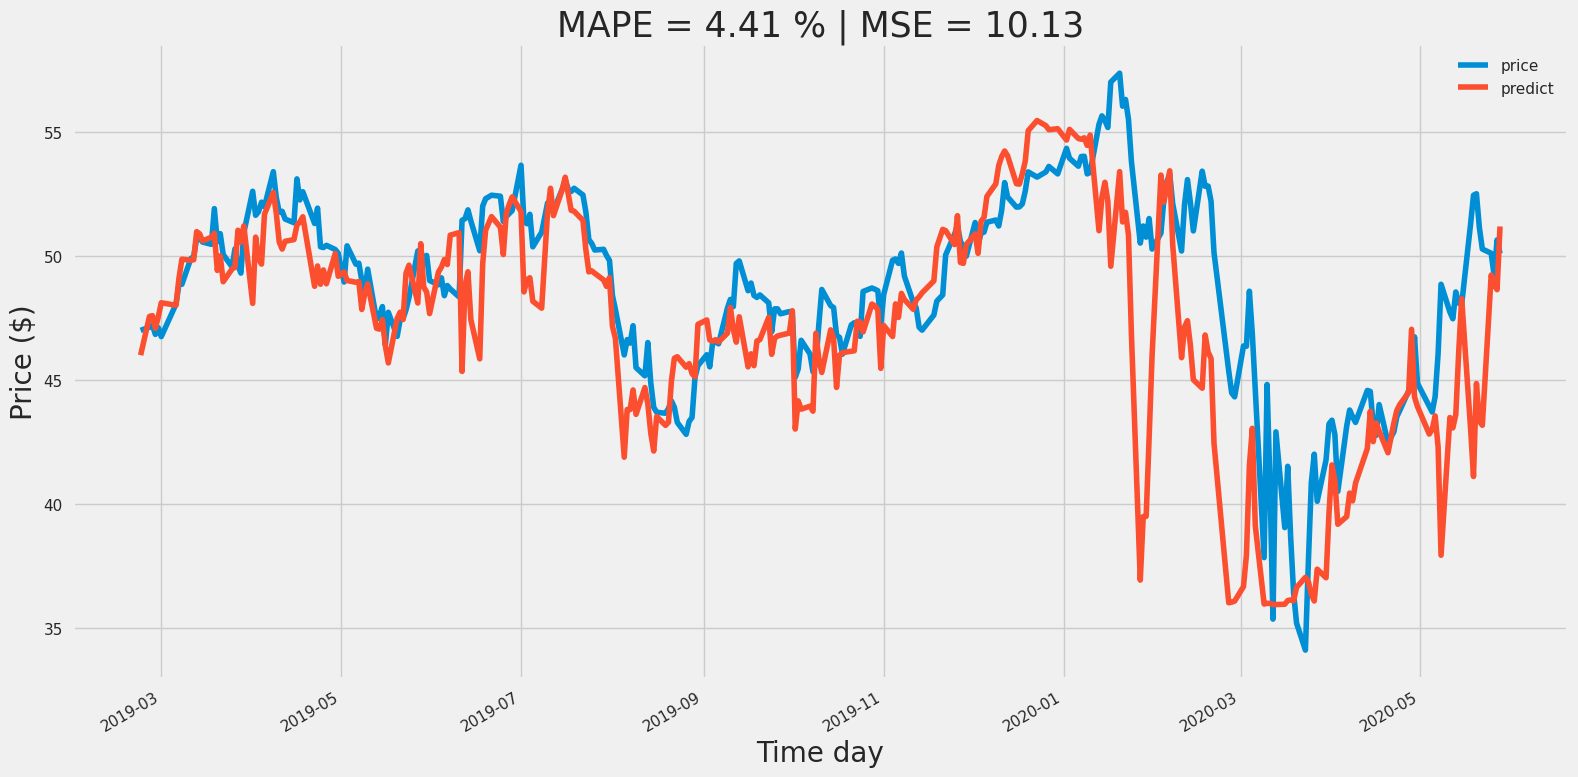

In [ ]:
show_result_model(df_train=y_train,
                  df_test=y_test,
                  y_forecast=y_pred_svm_regressor,
                  model_name='model_svm_regressor')

In [ ]:
dict_results


{'model_rf_regressor': [2.199202099067652, 1.8554120508791794],
 'model_svm_regressor': [4.40842194640458, 10.128906074086458]}

**Deep Learning Model**
This notebook has the following deep learning models compared: LSTM

In [ ]:
import numpy as np
import pandas as pd

# Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Other
from IPython.display import Image
from time import time
import configparser
import subprocess
import warnings
import pprint
import os

In [ ]:

df_vale3 = pd.read_csv('df_vale3_cleansing.csv',
                        encoding='utf8',
                        delimiter=',',
                        parse_dates=True,
                        index_col=0,
                        verbose=True)

Tokenization took: 4.05 ms
Type conversion took: 3.14 ms
Parser memory cleanup took: 0.01 ms


In [ ]:
df_vale3.head()


,price,residue,trend,seasonality,diff_1,diff_2,diff_3,diff_4,diff_5
data,,,,,,,,,
2010-07-12,40.00,1.00,41.83,1.00,-0.60,-0.46,0.49,0.98,0.42
2010-07-13,40.07,1.04,41.91,1.00,0.07,-0.53,-0.39,0.56,1.05
2010-07-14,40.08,1.03,41.98,1.00,0.01,0.08,-0.52,-0.38,0.57
2010-07-15,39.76,1.04,42.05,1.00,-0.32,-0.31,-0.24,-0.84,-0.70
2010-07-16,38.88,1.03,42.12,1.00,-0.88,-1.20,-1.19,-1.12,-1.72


In [ ]:
size_train = 2132
size_test = 313
print(size_train)
print(size_test)

df_train = df_vale3.iloc[:size_train]
df_test = df_vale3.iloc[size_train:]
print(df_train.columns)
print(df_test.columns)

2132
313
Index(['price', 'residue', 'trend', 'seasonality', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')
Index(['price', 'residue', 'trend', 'seasonality', 'diff_1', 'diff_2',
       'diff_3', 'diff_4', 'diff_5'],
      dtype='object')


Text(0.5, 1.0, 'Train size: 2132')

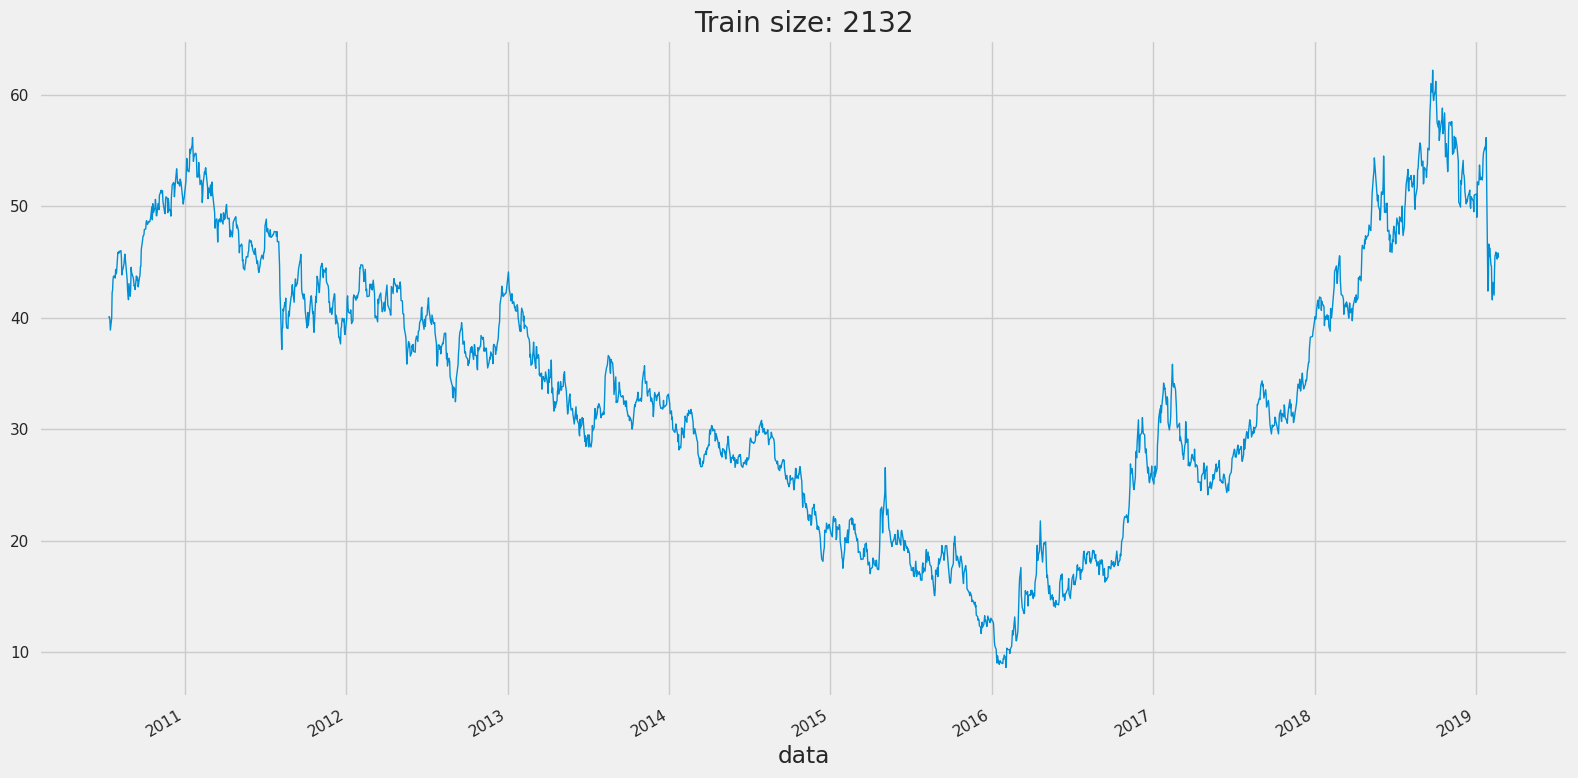

In [ ]:
df_train['price'].plot(linewidth=1) #split data
plt.grid(True)
plt.title(f'Train size: {len(df_train)}')

Text(0.5, 1.0, 'Test size: 313')

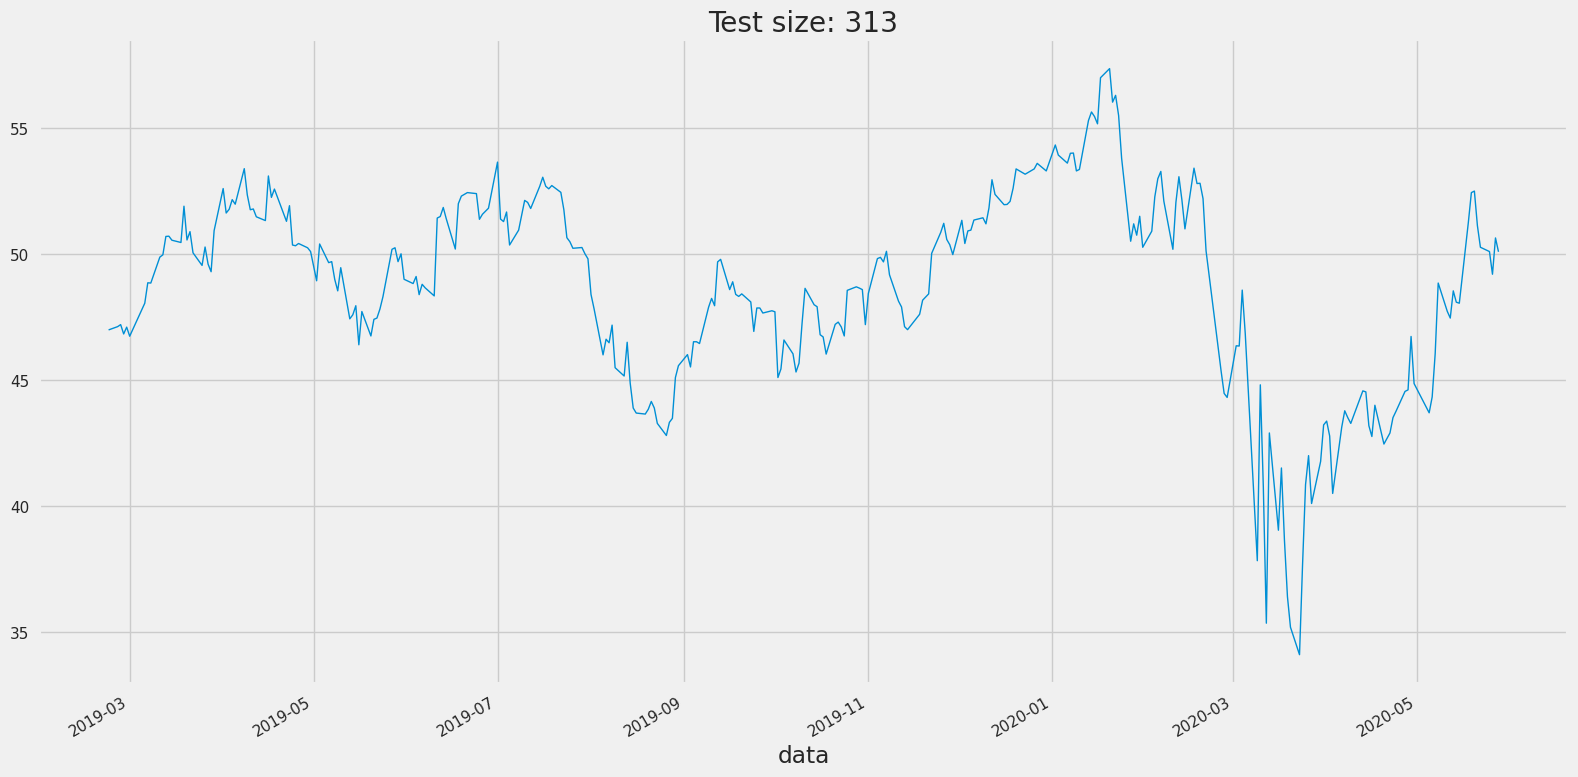

In [ ]:
df_test['price'].plot(linewidth=1)
plt.grid(True)
plt.title(f'Test size: {len(df_test)}')

In [ ]:
df_train.index


DatetimeIndex(['2010-07-12', '2010-07-13', '2010-07-14', '2010-07-15',
               '2010-07-16', '2010-07-19', '2010-07-20', '2010-07-21',
               '2010-07-22', '2010-07-23',
               ...
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15', '2019-02-18', '2019-02-19',
               '2019-02-20', '2019-02-21'],
              dtype='datetime64[ns]', name='data', length=2132, freq=None)

In [ ]:
df_test.index


DatetimeIndex(['2019-02-22', '2019-02-25', '2019-02-26', '2019-02-27',
               '2019-02-28', '2019-03-01', '2019-03-06', '2019-03-07',
               '2019-03-08', '2019-03-11',
               ...
               '2020-05-15', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='data', length=313, freq=None)

In [ ]:
dict_results = {}


In [ ]:
def show_result_model(df_train, df_test, y_forecast, model_name):
    future_forecast = pd.DataFrame(y_forecast,
                                   index=df_test.index,
                                   columns=['predict'])
    #mape = mean_absolute_percentage_error(df_test, y_forecast)
    mape = mean_absolute_percentage_error(df_test, y_forecast)*100

    mse = mean_squared_error(df_test, y_forecast, squared=True)
    dict_results[model_name] = [mape, mse]

    pd.concat([df_test, future_forecast], axis=1).plot()

    plt.legend()
    plt.grid(True)
    plt.xlabel("Time day", fontsize=20)
    plt.ylabel("Price ($)", fontsize=20)
    plt.title(f'MAPE = {mape:.2f} % | MSE = {mse:.2f}', fontsize=25)

In [ ]:
train_max = df_train.max()
train_min = df_train.min()

train = (df_train - train_min)/(train_max - train_min)
test = (df_test - train_min)/(train_max - train_min)

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []

    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])

    return np.array(Xs).astype('float32'), np.array(ys).astype('float32')

In [ ]:

time_steps = 1

X_train, y_train = create_dataset(train, train['price'], time_steps)
X_test, y_test = create_dataset(test, test['price'], time_steps)

**Build Model LSTM**


In [ ]:
model_lstm = Sequential(name='lstm_vale3')
model_lstm

**Input Layer**

In [ ]:
#Adding the first LSTM layer and some Dropout regularisation
model_lstm.add(LSTM(units=len(df_train.columns),
                    return_sequences=True,
                    input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.2))

In [ ]:
# Adding a second LSTM layer and some Dropout regularisation
model_lstm.add(LSTM(units=10, return_sequences=True))
model_lstm.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model_lstm.add(LSTM(units=10, return_sequences=True))
model_lstm.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model_lstm.add(LSTM(units=10))
model_lstm.add(Dropout(0.2))

In [ ]:
model_lstm.add(Dense(units=1)) #RNA complication


In [ ]:
model_lstm.compile(loss='mean_squared_error',
                   optimizer='adam',
                   metrics=['mse', 'mape'])

In [ ]:
model_lstm.summary() # summary ANN RNA


Model: "lstm_vale3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 9)              684       
                                                                 
 dropout_4 (Dropout)         (None, 1, 9)              0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 10)             800       
                                                                 
 dropout_5 (Dropout)         (None, 1, 10)             0         
                                                                 
 lstm_6 (LSTM)               (None, 1, 10)             840       
                                                                 
 dropout_6 (Dropout)         (None, 1, 10)             0         
                                                                 
 lstm_7 (LSTM)               (None, 10)                8

**TRAINING**

In [ ]:

%%time


history = model_lstm.fit(X_train,
                         y_train,
                         epochs=1000,
                         batch_size=30,
                         shuffle=False,
                         validation_split=0.30,
                         verbose=0)
history

CPU times: user 9min, sys: 15 s, total: 9min 15s
Wall time: 7min 29s


In [ ]:
print(history.history.keys())


dict_keys(['loss', 'mse', 'mape', 'val_loss', 'val_mse', 'val_mape'])


In [ ]:
best_epochs = history.history["loss"].index(min(history.history["loss"]))
best_epochs

964

In [ ]:
max(history.history["loss"])


0.21359212696552277

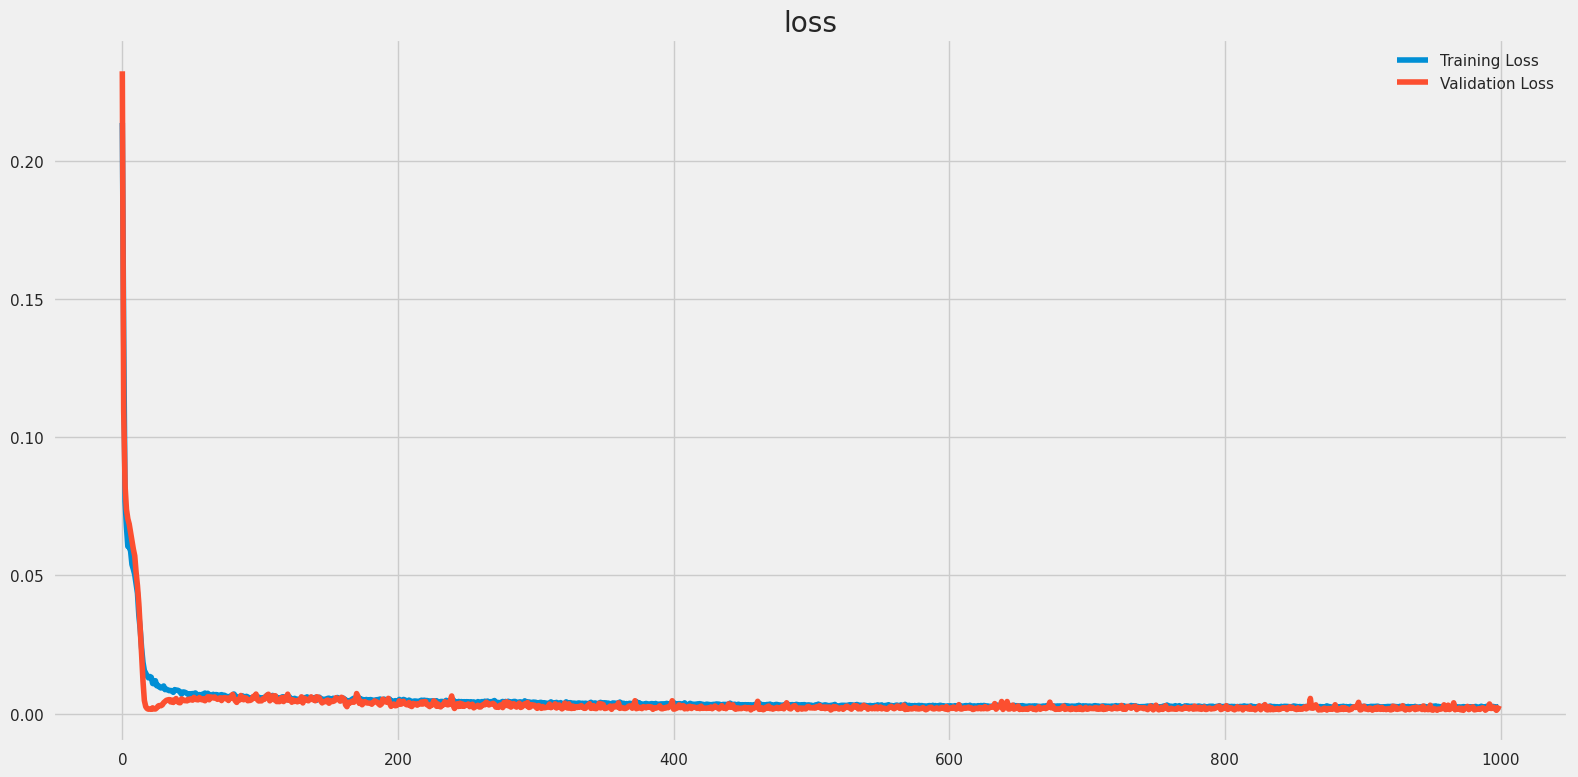

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title('loss')
plt.legend()
plt.show()

**Predict**

In [ ]:
y_pred = model_lstm.predict(X_test)


10/10 [==============================] - 2s 3ms/step


In [ ]:
# Rescale the data back to the original scale
y_test = y_test*(train_max[0] - train_min[0]) + train_min[0]
y_pred = y_pred*(train_max[0] - train_min[0]) + train_min[0]
y_train = y_train*(train_max[0] - train_min[0]) + train_min[0]

In [ ]:
y_test[:10]


array([47.120003, 47.199997, 46.83    , 47.1     , 46.739998, 48.049995,
       48.86    , 48.85    , 49.879997, 49.97    ], dtype=float32)

In [ ]:
len(y_test)


312

In [ ]:
y_train[:10]


array([40.07    , 40.079998, 39.760002, 38.879997, 39.969997, 42.229996,
       42.47    , 43.370003, 43.71    , 43.730003], dtype=float32)

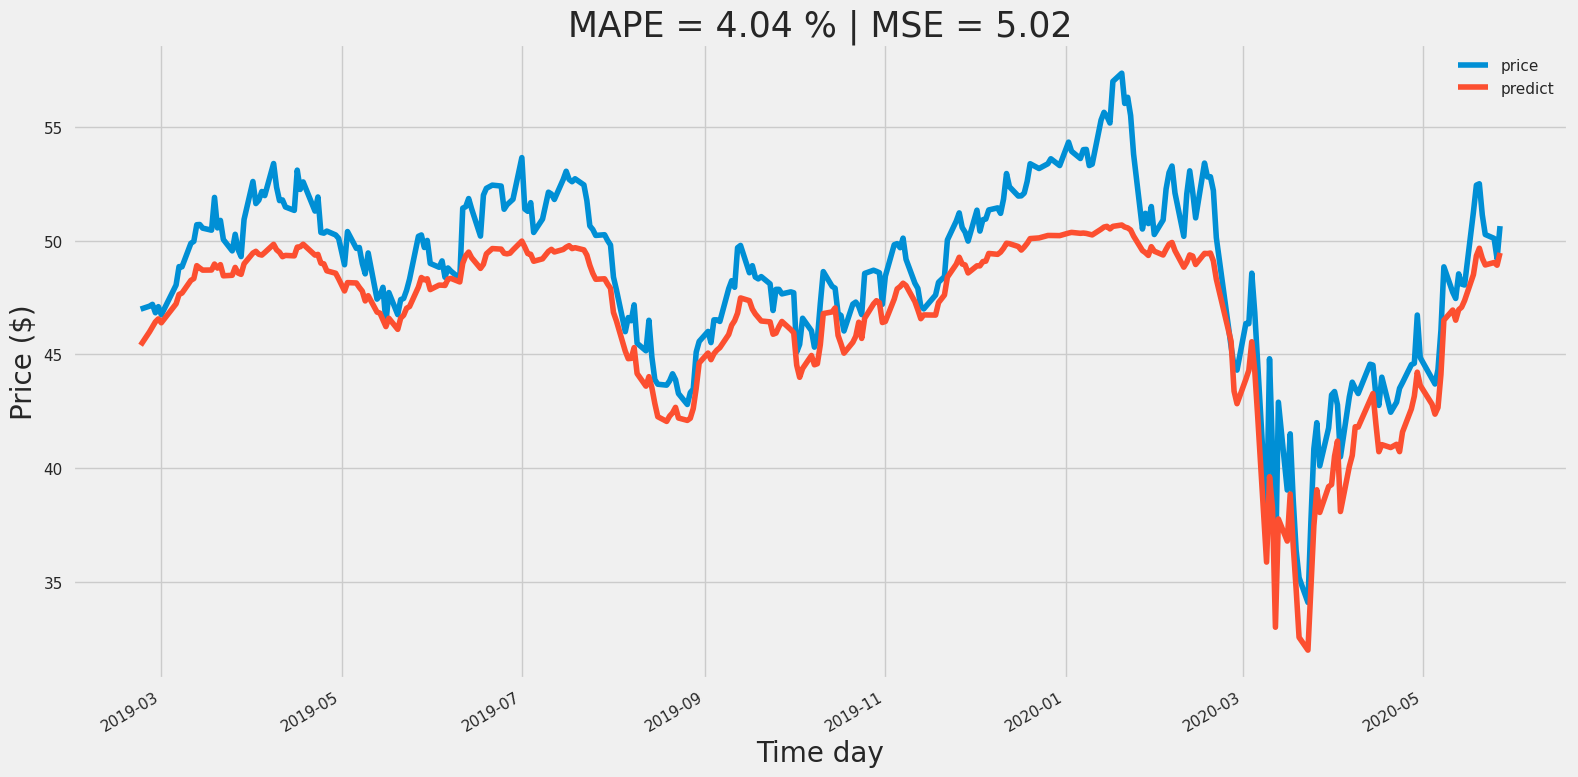

In [ ]:
show_result_model(df_train=df_test['price'][:312],
                  df_test=df_test['price'][:312],
                  y_forecast=y_pred[:312],
                  model_name='model_lstm')